# Portofolio:

## Business Understanding

### Introduction

### Objectives

The aim of this project is to understand whether or not:
- There is a significant difference in total repeat purchases between casual and member customers.
- There is a significant difference in total amount of purchases between casual and member customers.
- There is a significant difference in average purchases between casual and member customers.
- There is a significant association between city and customers that decides to become members.

### Tools and Dataset Needed

We will use seblak prasmanan database. Seblak prasmanan is one of the new Indonesian traditional food. It's a boiled krupuk with various topping and what make seblak prasmanan special is you can take only topping that you like as many as you want.

The tools we need for this analysis is only Python programming language and the library such as numpy, pandas, matplotlib, seaborn, and scipy.

### Methodology

Because we will do two types of testing, we will seperate them into two.

#### T-test

Assumption:
- The sample must be independent.
- The sample must normally distributed. If not, use Mann Whitney U test.
- The sample must be clean from outliers.

Null Hypothesis:
- Conceptual: There are no significant differences between group A and group B.
- Mathematical: The mean/median score for group A is equal to the mean/median score for group B.

Alternative Hypothesis:
- Conceptual: There is a significant difference between group A and group B.
- Mathematical: The mean/median score for group A is not equal to the mean/median score for group B.

#### Chi-square test

Assumption:
- There are two categorical variables.
- The sample are independent.
- The amount of expected value must be greater than 5.

Null Hypothesis:
- Conceptual: There are no significant association between variable X and variable Y.
- Mathematical: The observed frequencies is equal to the expected frequencies.

Alternative Hypothesis:
- Conceptual: There are significant associations between variable X and variable Y.
- Mathematical: The observed frequencies are not equal to the expected frequencies.

## Data Understanding

### Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set_palette('viridis')
def figure(size='big'):
    if size == 'small':
        plt.figure(figsize=(6,5))
    elif size == 'big':
        plt.figure(figsize=(16,5), dpi=300)

In [3]:
dataset = pd.read_csv('data/seblak_dataset.csv')
dataset.head()

,customer_id,transaction_date,city,customer_type,purchase
0,7,2023-09-23,Jakarta,member,193
1,22,2023-05-05,Jakarta,member,160
2,31,2023-10-05,Tangerang,member,194
3,50,2023-10-12,Jakarta,member,171
4,13,2023-08-15,Bekasi,member,177


### Data Profiling

In [4]:
# dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       3936 non-null   int64 
 1   transaction_date  3936 non-null   object
 2   city              3936 non-null   object
 3   customer_type     3936 non-null   object
 4   purchase          3936 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 153.9+ KB


In [5]:
# missing values
dataset.isnull().sum()

customer_id         0
transaction_date    0
city                0
customer_type       0
purchase            0
dtype: int64

In [6]:
# duplicated values
dataset.duplicated().sum()

np.int64(1)

In [7]:
# correct wrong format
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3936 non-null   int64         
 1   transaction_date  3936 non-null   datetime64[ns]
 2   city              3936 non-null   object        
 3   customer_type     3936 non-null   object        
 4   purchase          3936 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 153.9+ KB


### Descriptive Statistics

#### Numeric

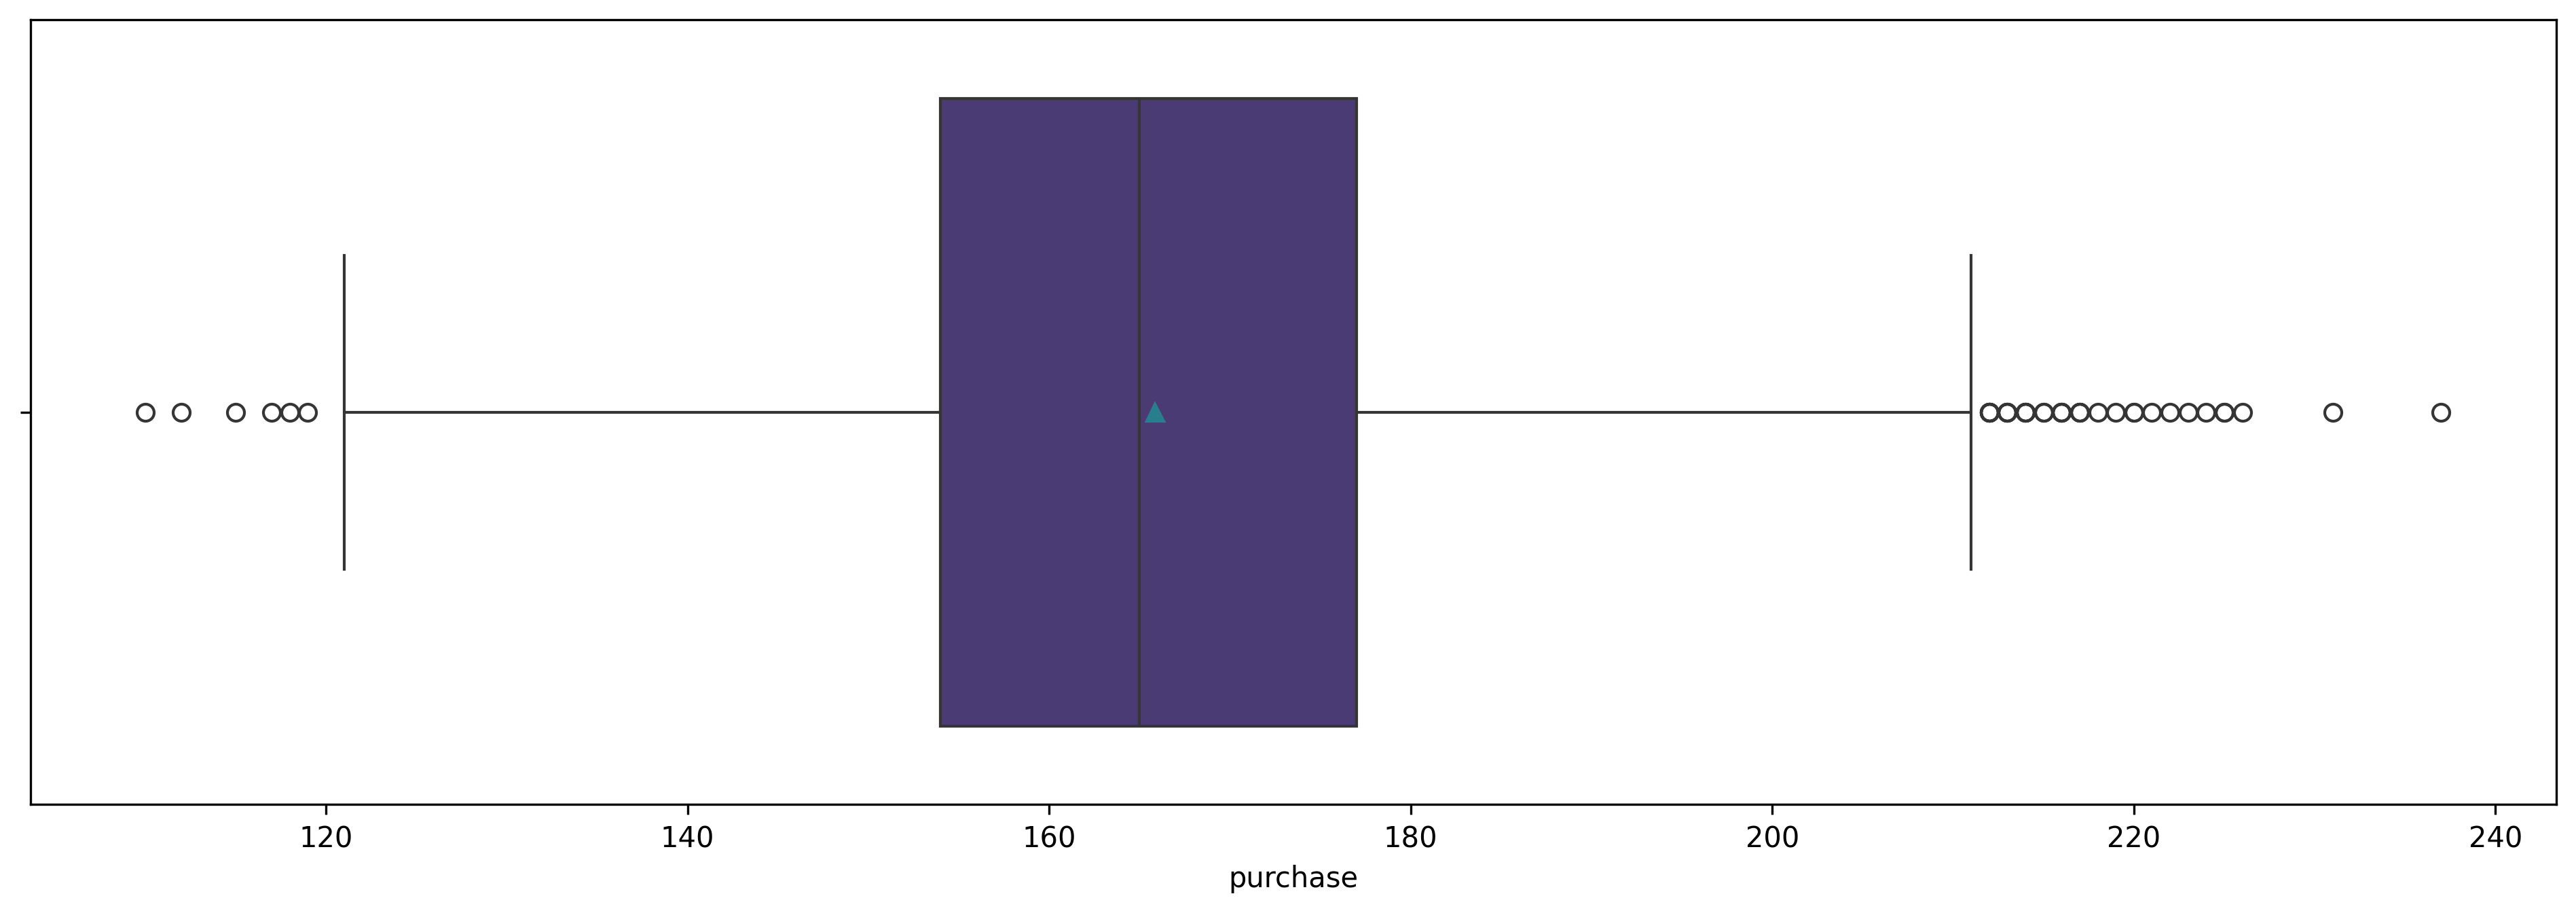

In [8]:
figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.show()

In [9]:
print(round(dataset['purchase'].describe(),3))

count    3936.000
mean      165.862
std        17.159
min       110.000
25%       154.000
50%       165.000
75%       177.000
max       237.000
Name: purchase, dtype: float64


We can see that there are some dots before minimum line and after maximum line which indicate outliers. We can try to shave it if makes the distribution better.

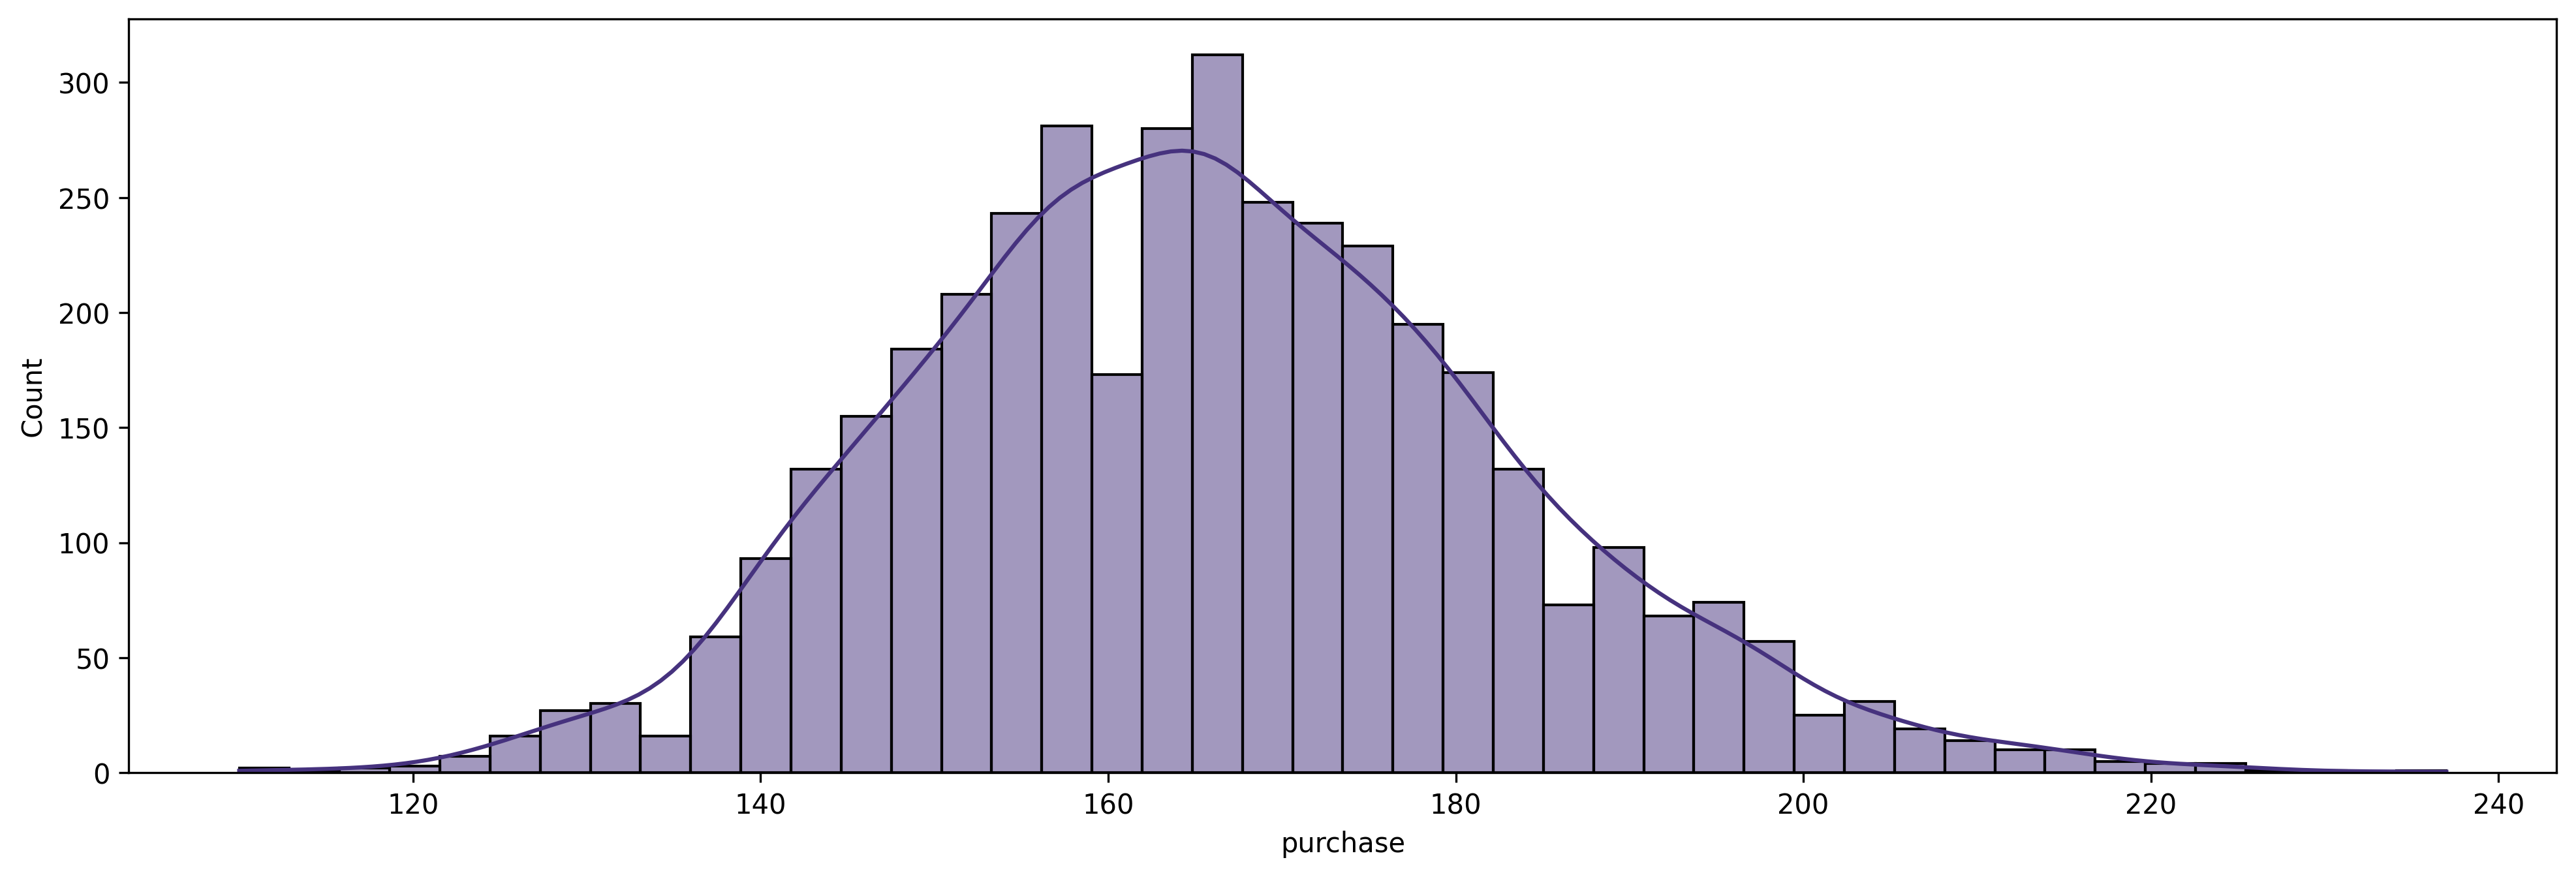

In [10]:
figure()
sns.histplot(dataset['purchase'],kde=True)
plt.show()

In [11]:
count_purchase = dataset.groupby('customer_id')['customer_id'].count()

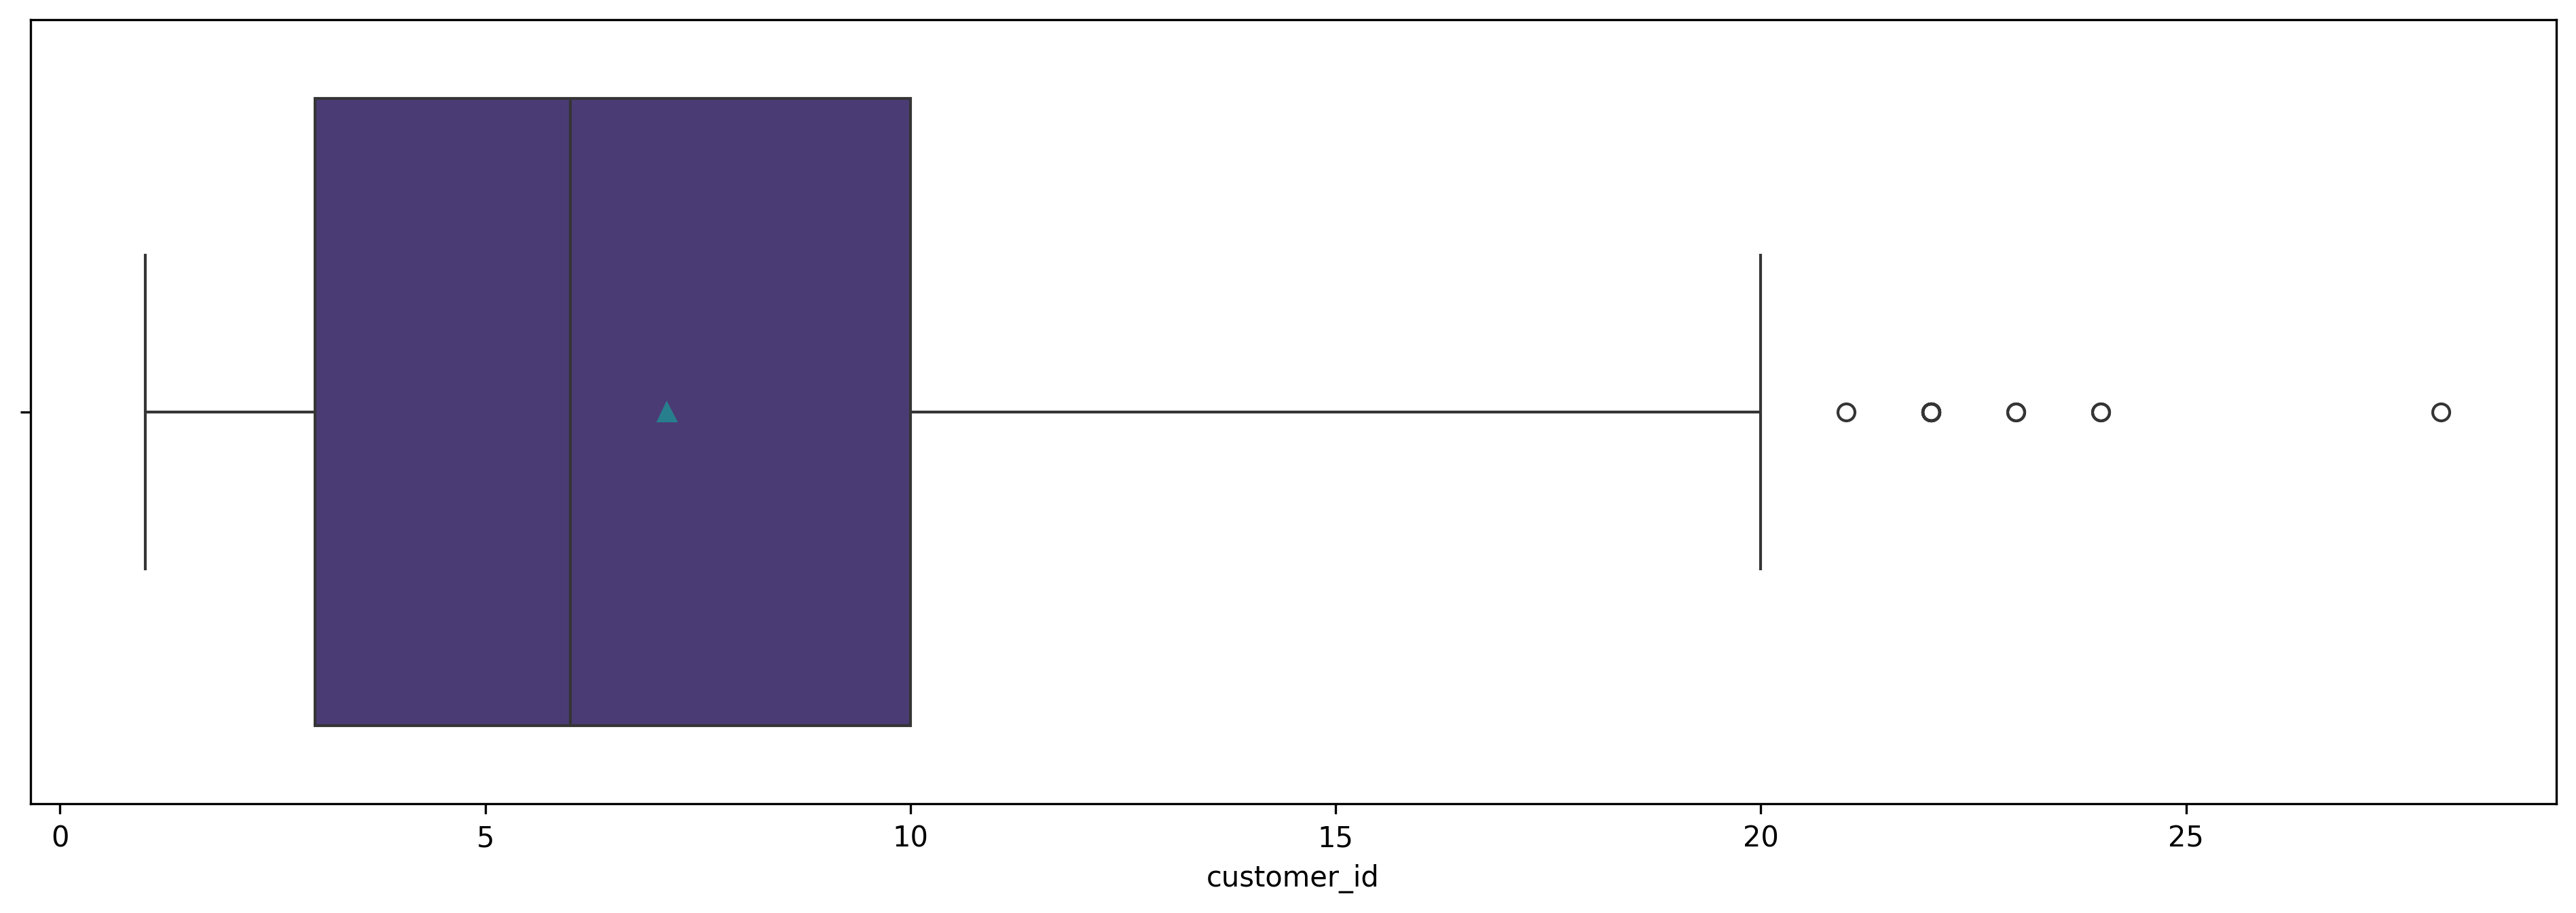

In [12]:
figure()
sns.boxplot(x=count_purchase, showmeans=True)
plt.show()

In [13]:
print(round(count_purchase.describe(), 3))

count    552.000
mean       7.130
std        5.289
min        1.000
25%        3.000
50%        6.000
75%       10.000
max       28.000
Name: customer_id, dtype: float64


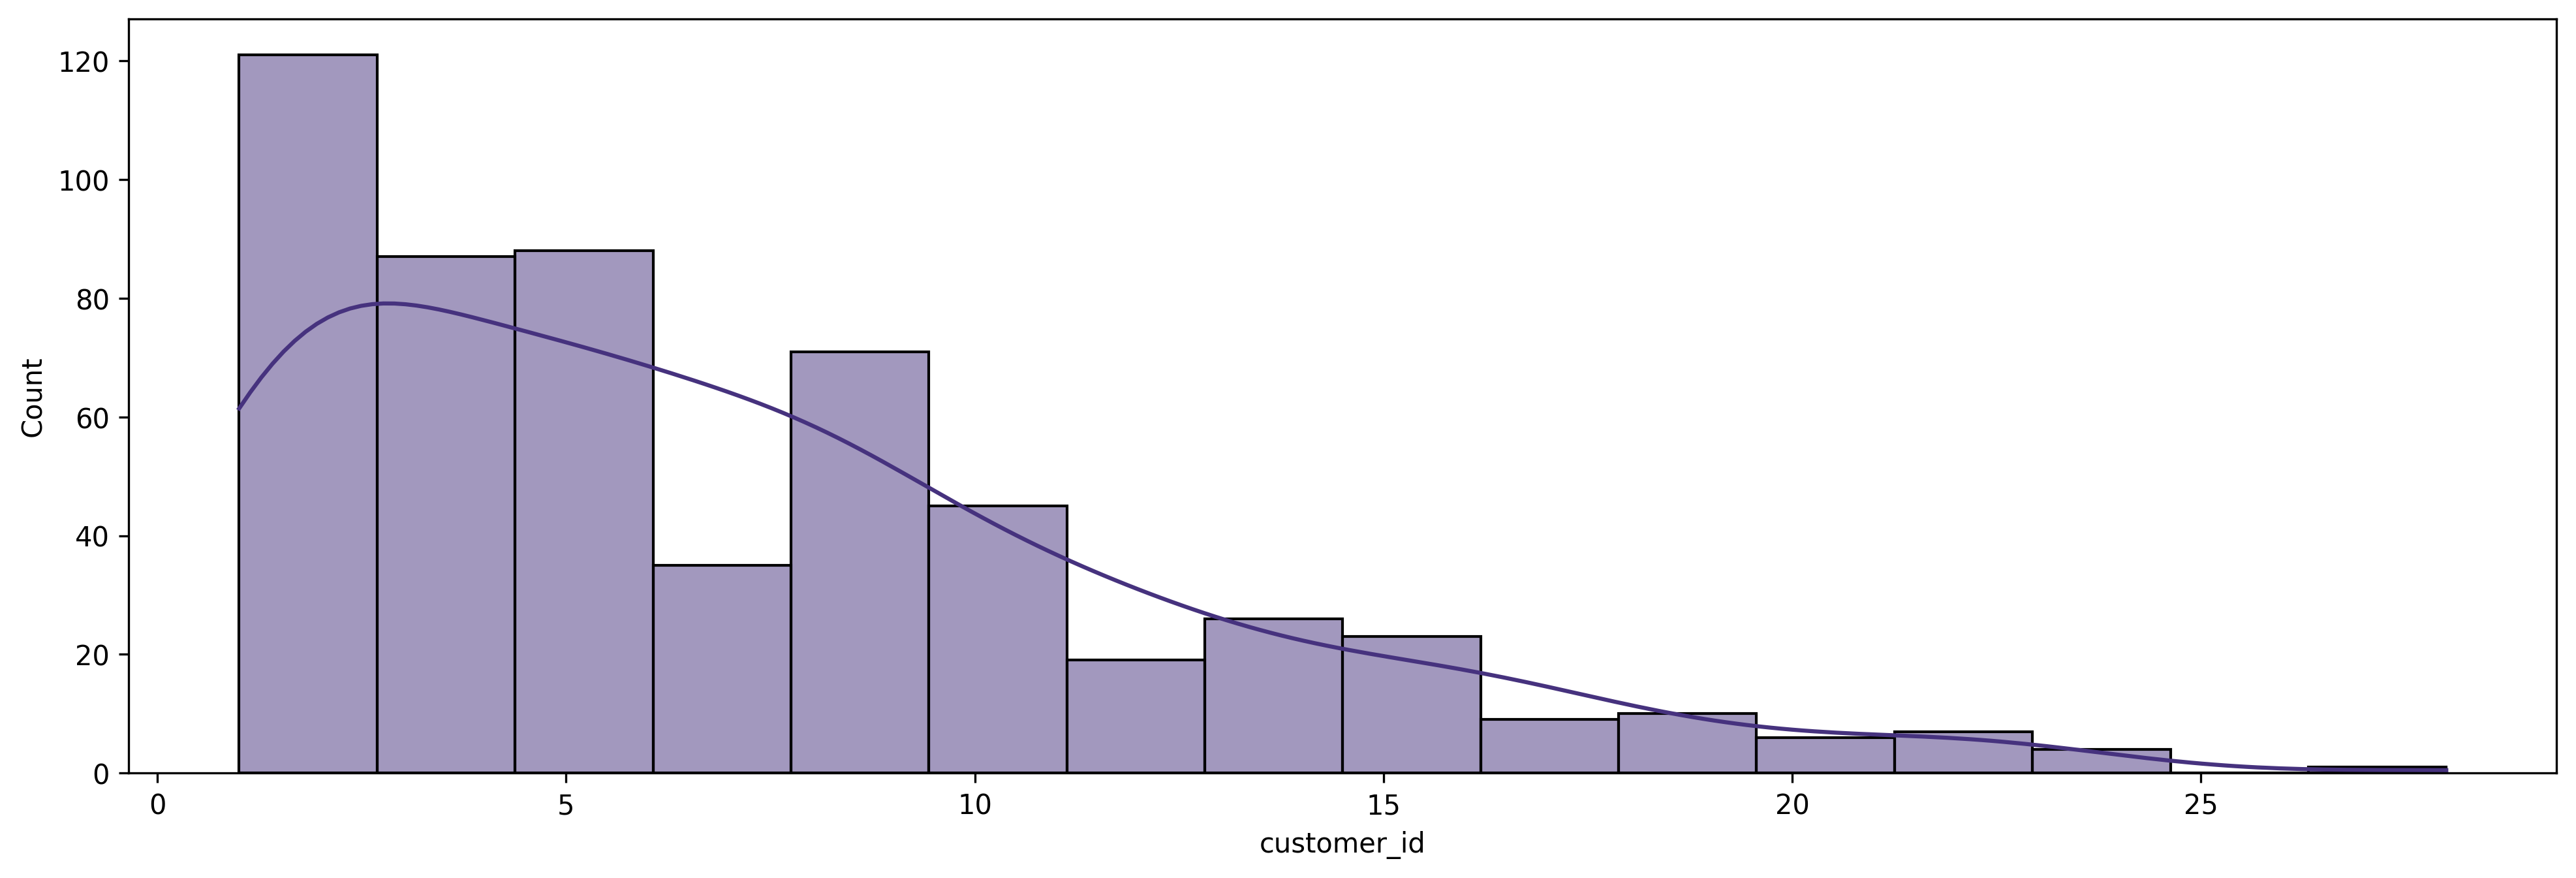

In [14]:
figure()
sns.histplot(count_purchase, kde=True)
plt.show()

In [15]:
def normality_test(array):
    stat, p1 = stats.shapiro(array)
    stat, p2 = stats.normaltest(array)
    if p1 >= 0.05:
        print('fail to reject H0 using shapiro test.')
        print(f"the variable is normally distributed with p-value: {p1}.")
    elif p1 < 0.05:
        print('accept to reject H0 using shapiro test.')
        print(f"the variable is not normally distributed with p-value {p1}.")
    print("")
    if p2 >= 0.05:
        print('fail to reject H0 using pearsons test.')
        print(f"the variable is normally distributed with p-value: {p2}.")
    elif p2 < 0.05:
        print('accept to reject H0 using pearsons test.')
        print(f"the variable is not normally distributed with p-value {p2}.")

In [16]:
normality_test(dataset['purchase'])

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 4.395176667479852e-11.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 1.93008707174402e-14.


After normality test, we know that purchase variable is not normally distributed and we cannot use parametric statistical test. We will use Mann Whitney U test where this alternative test is for non parametric dataset without assumpt gaussian distribution.

In [17]:
normality_test(count_purchase)

accept to reject H0 using shapiro test.
the variable is not normally distributed with p-value 1.1297520570001725e-17.

accept to reject H0 using pearsons test.
the variable is not normally distributed with p-value 2.827420371806528e-17.


customer repeat purchase(count_purchase) is also not gaussian distribution. So, we can use Mann Whitney U test for this variable.

#### Categorical

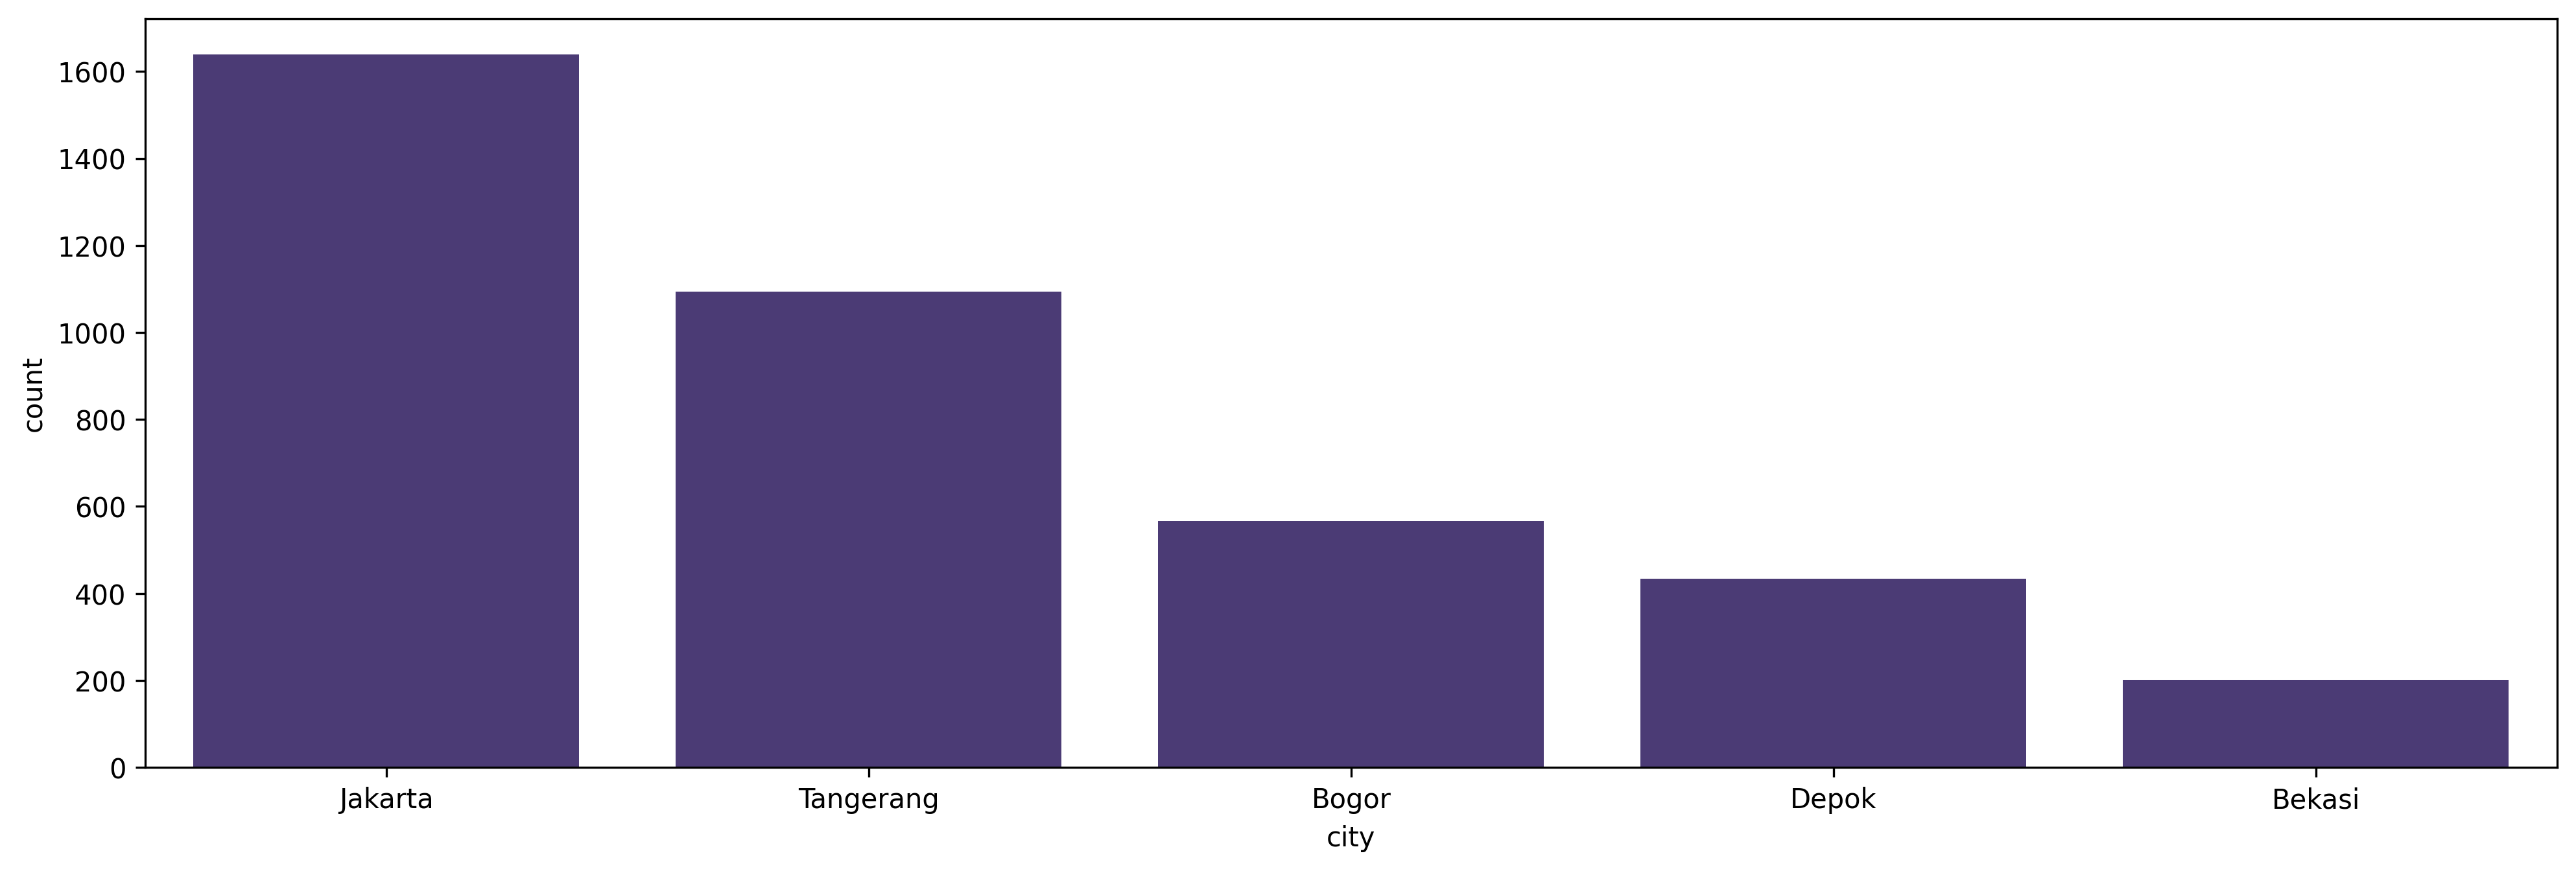

In [18]:
figure()
sns.barplot(dataset['city'].value_counts());

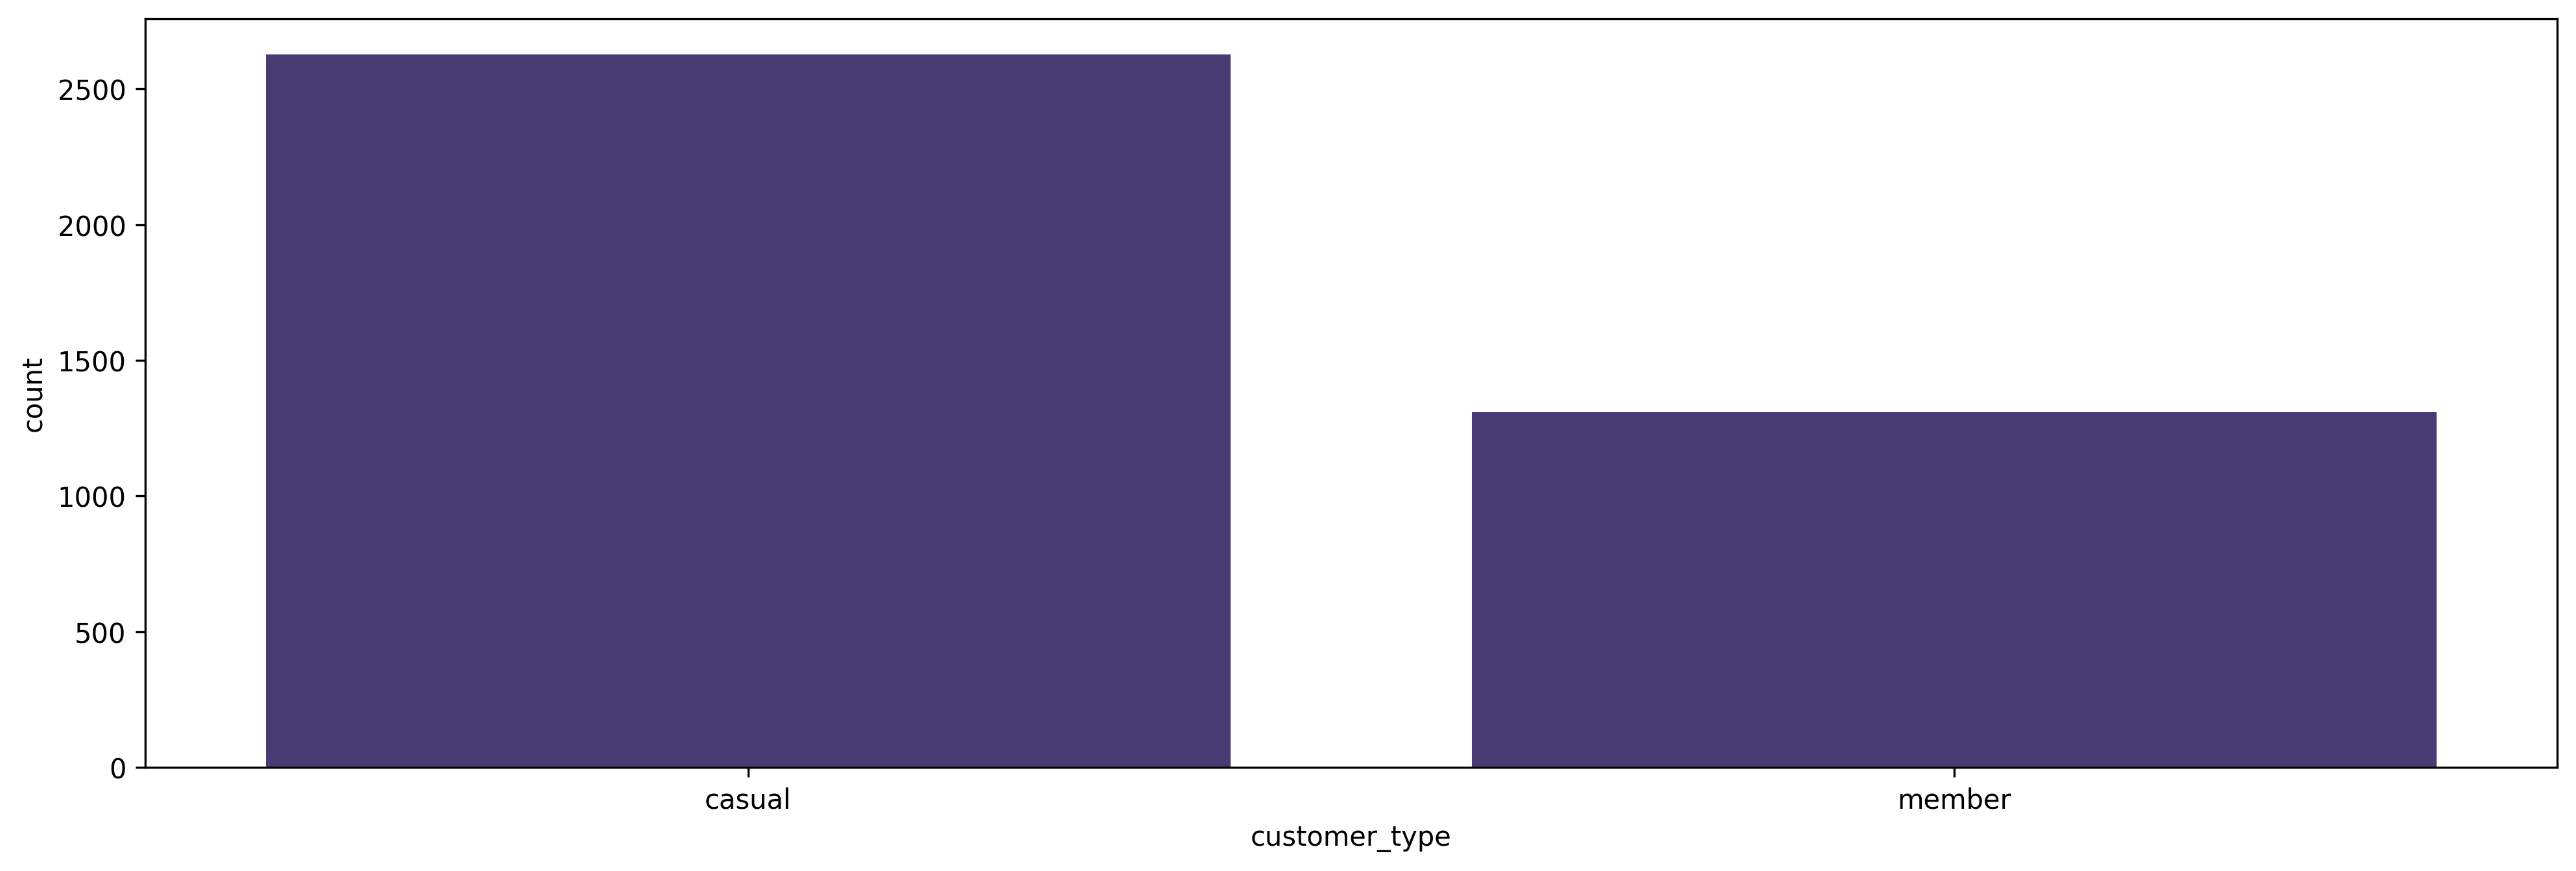

In [19]:
figure()
sns.barplot(dataset['customer_type'].value_counts());

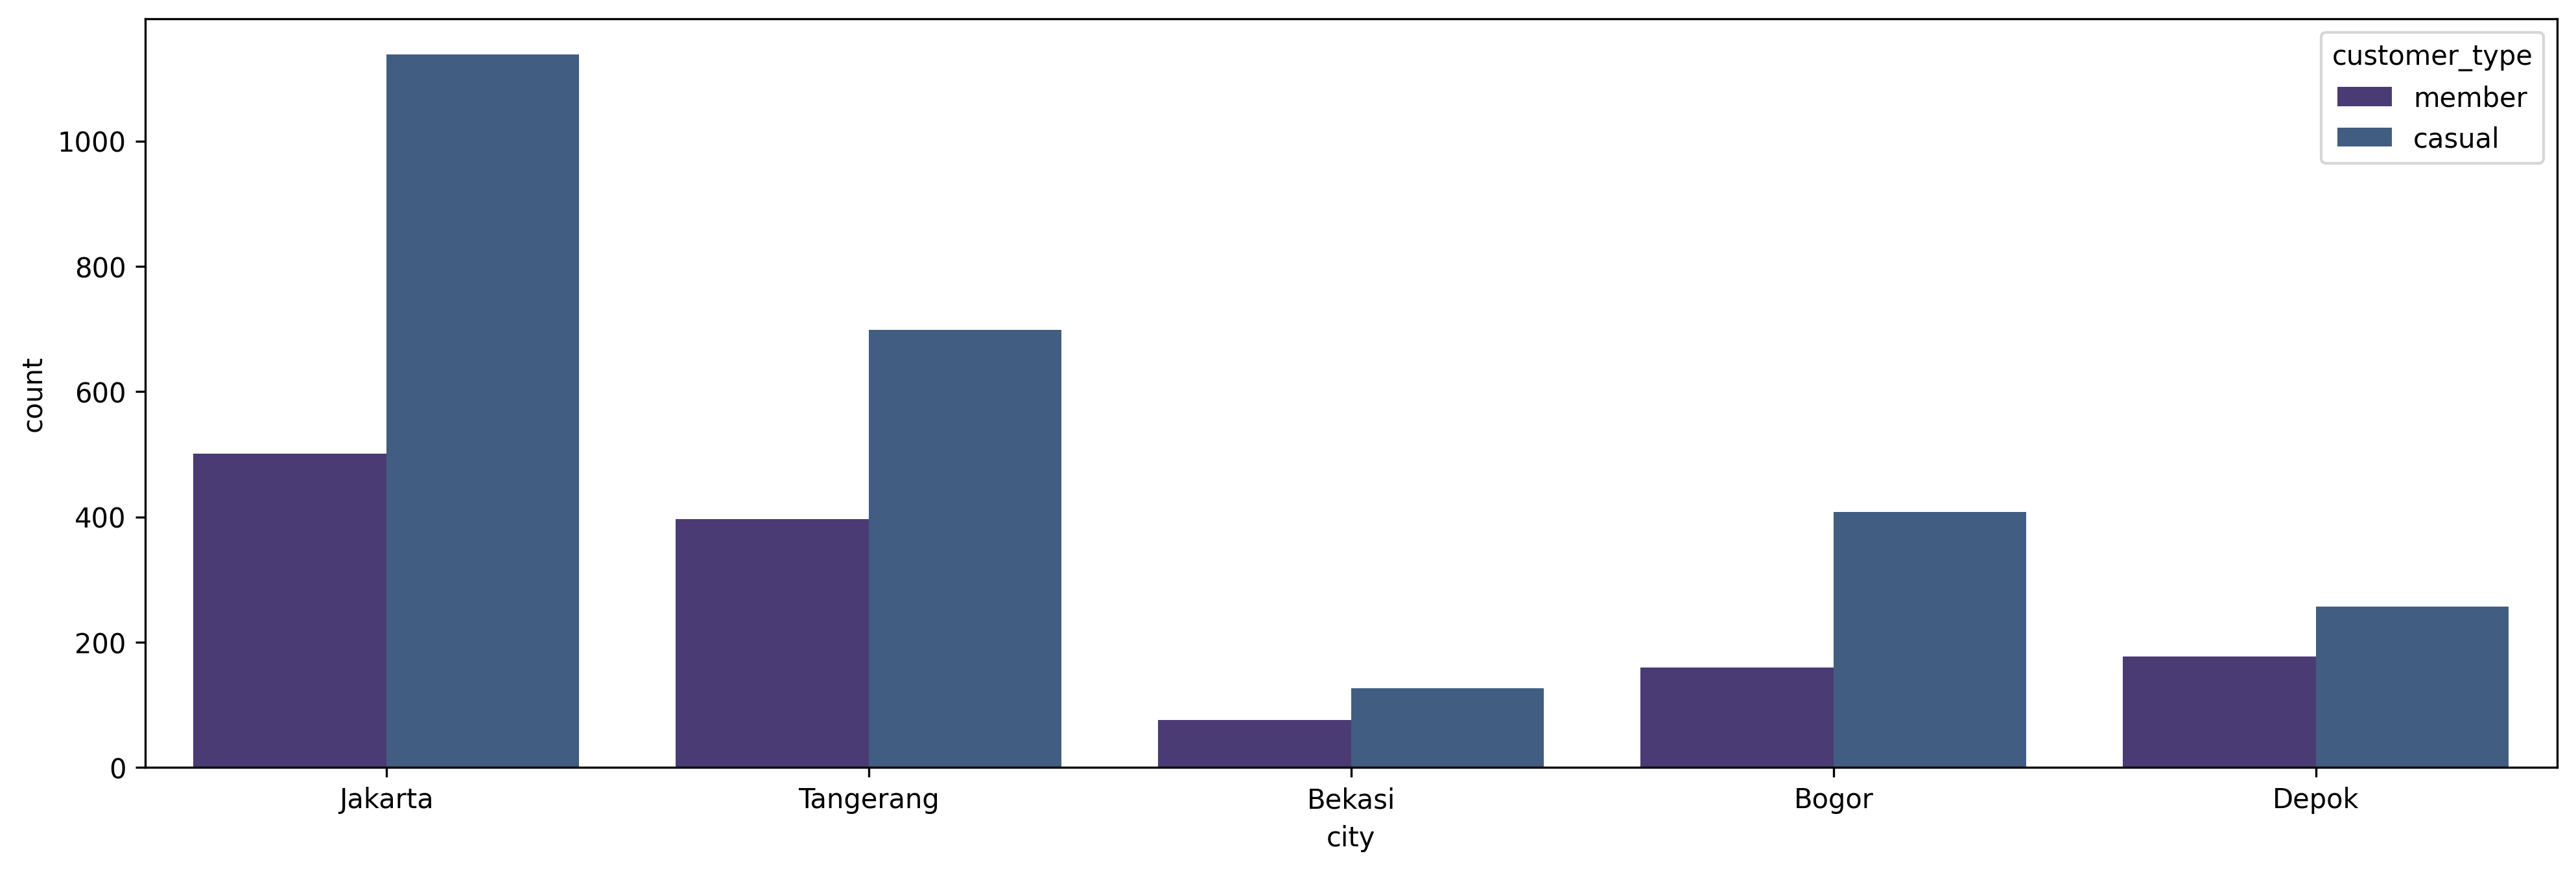

In [20]:
figure()
sns.countplot(dataset, x='city', hue='customer_type');

## Data Preprocessing

#### Handling Outliers

Lets see one more time the outliers based on boxplot visualization.

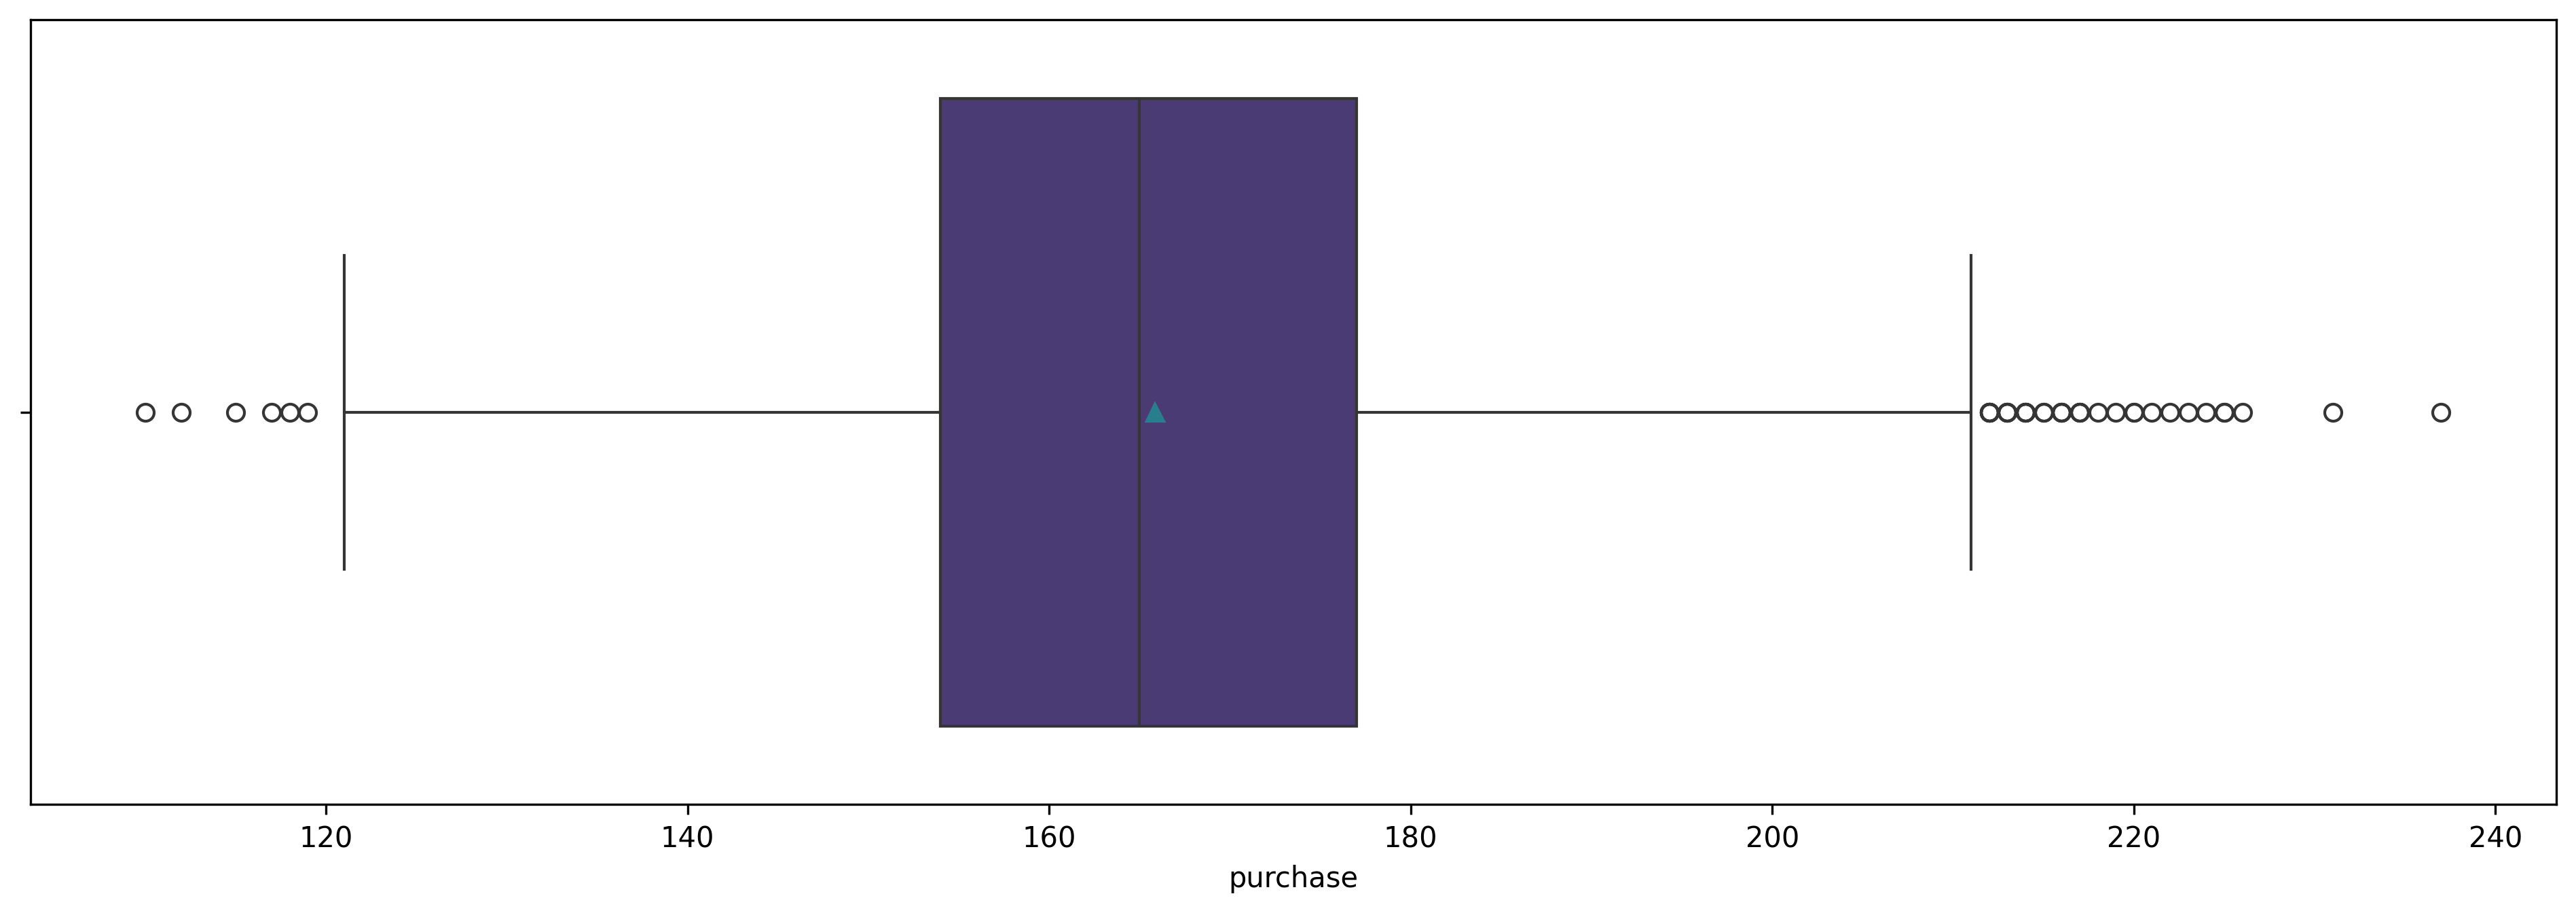

In [21]:
figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.show()

211.5
177.0
23.0
154.0
119.5


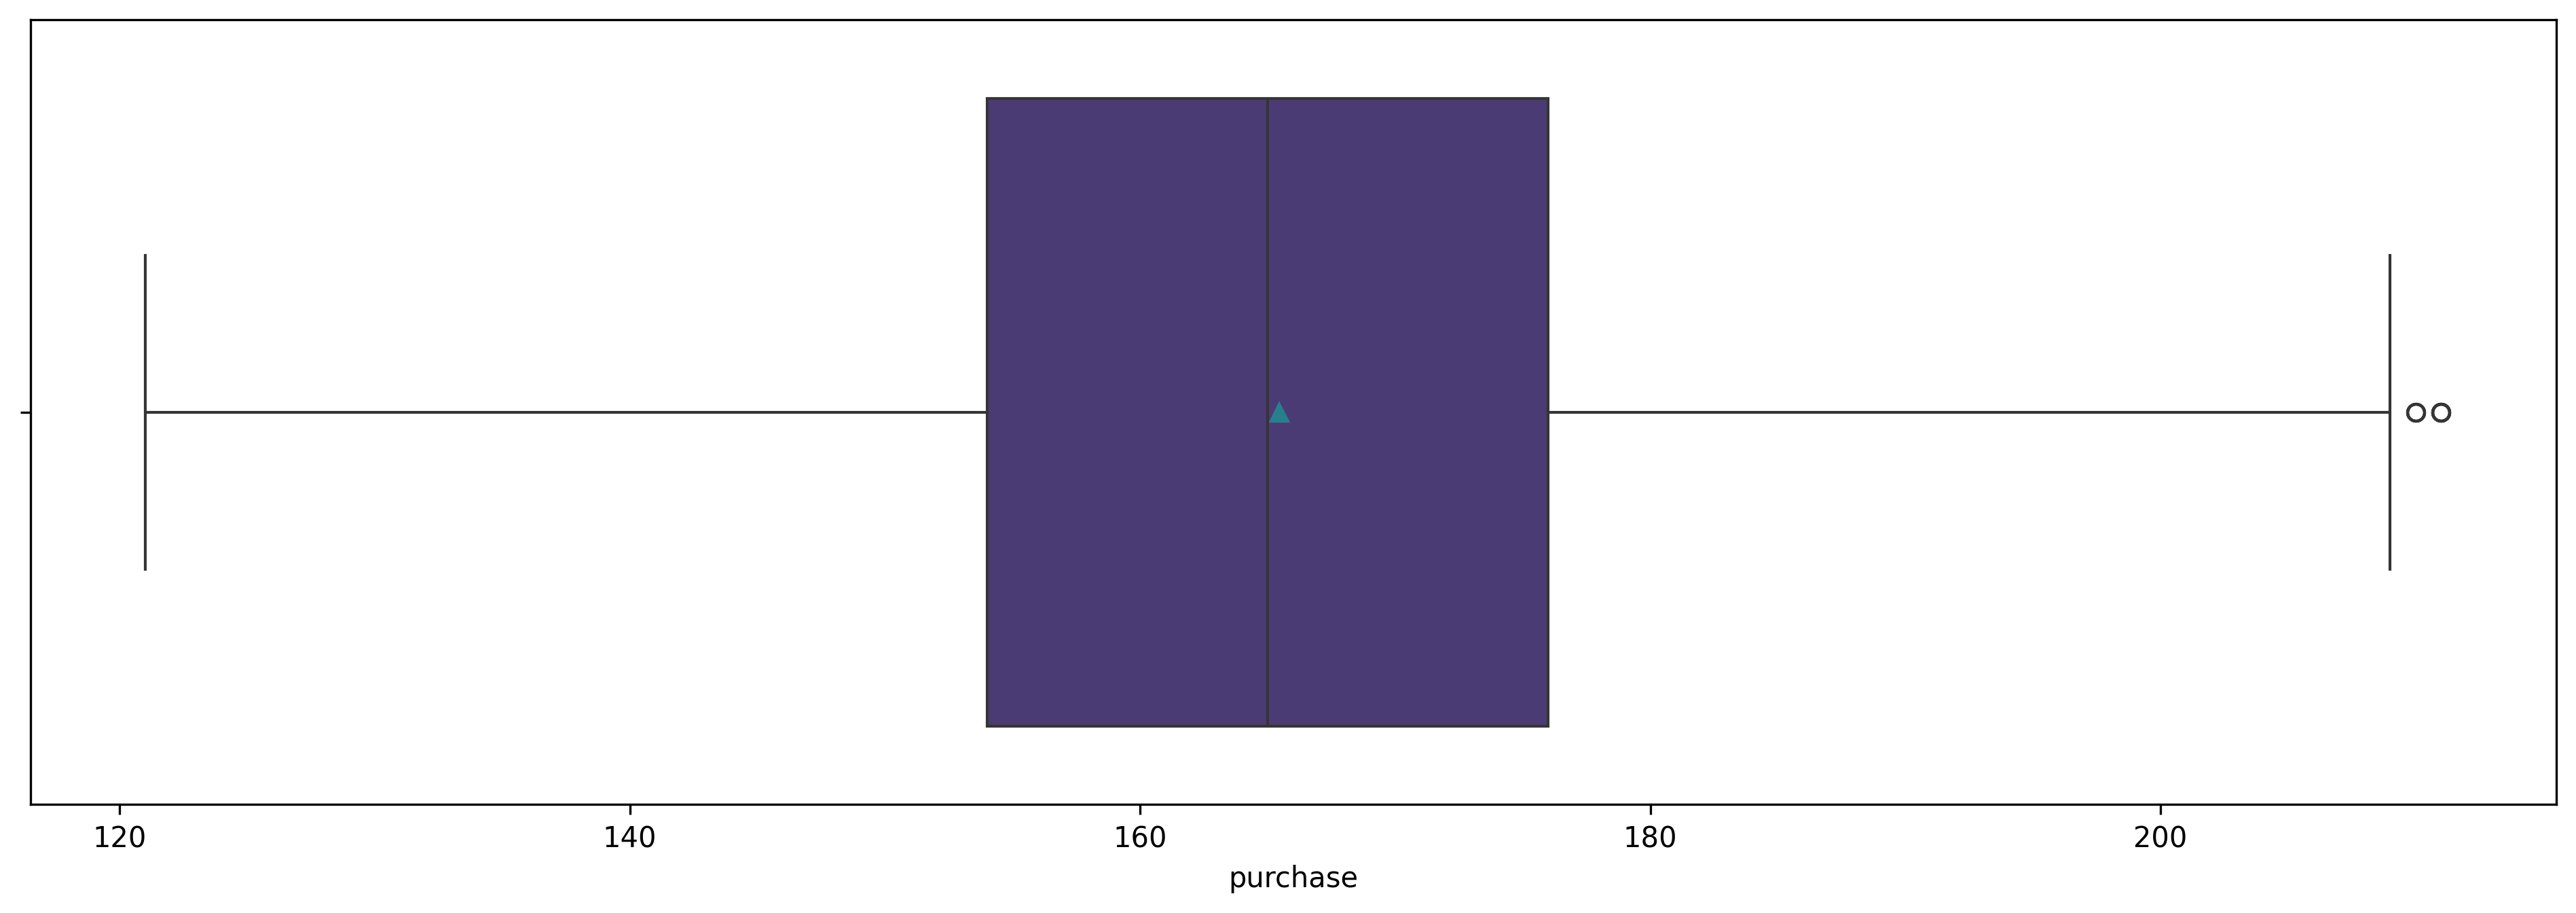

In [22]:
q3 = dataset['purchase'].quantile(0.75)
q1 = dataset['purchase'].quantile(0.25)
iqr = q3-q1
upper_line = q3 + (1.5*iqr)
lower_line = q1 - (1.5*iqr)

print(upper_line)
print(q3)
print(iqr)
print(q1)
print(lower_line)

dataset = dataset[(dataset['purchase'] <= upper_line) & ((dataset['purchase'] >= lower_line))]

figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.show()

We can see that there are still outliers. We can shave it one more time. If it still exists, we can leave it like that.

209.0
176.0
22.0
154.0
121.0


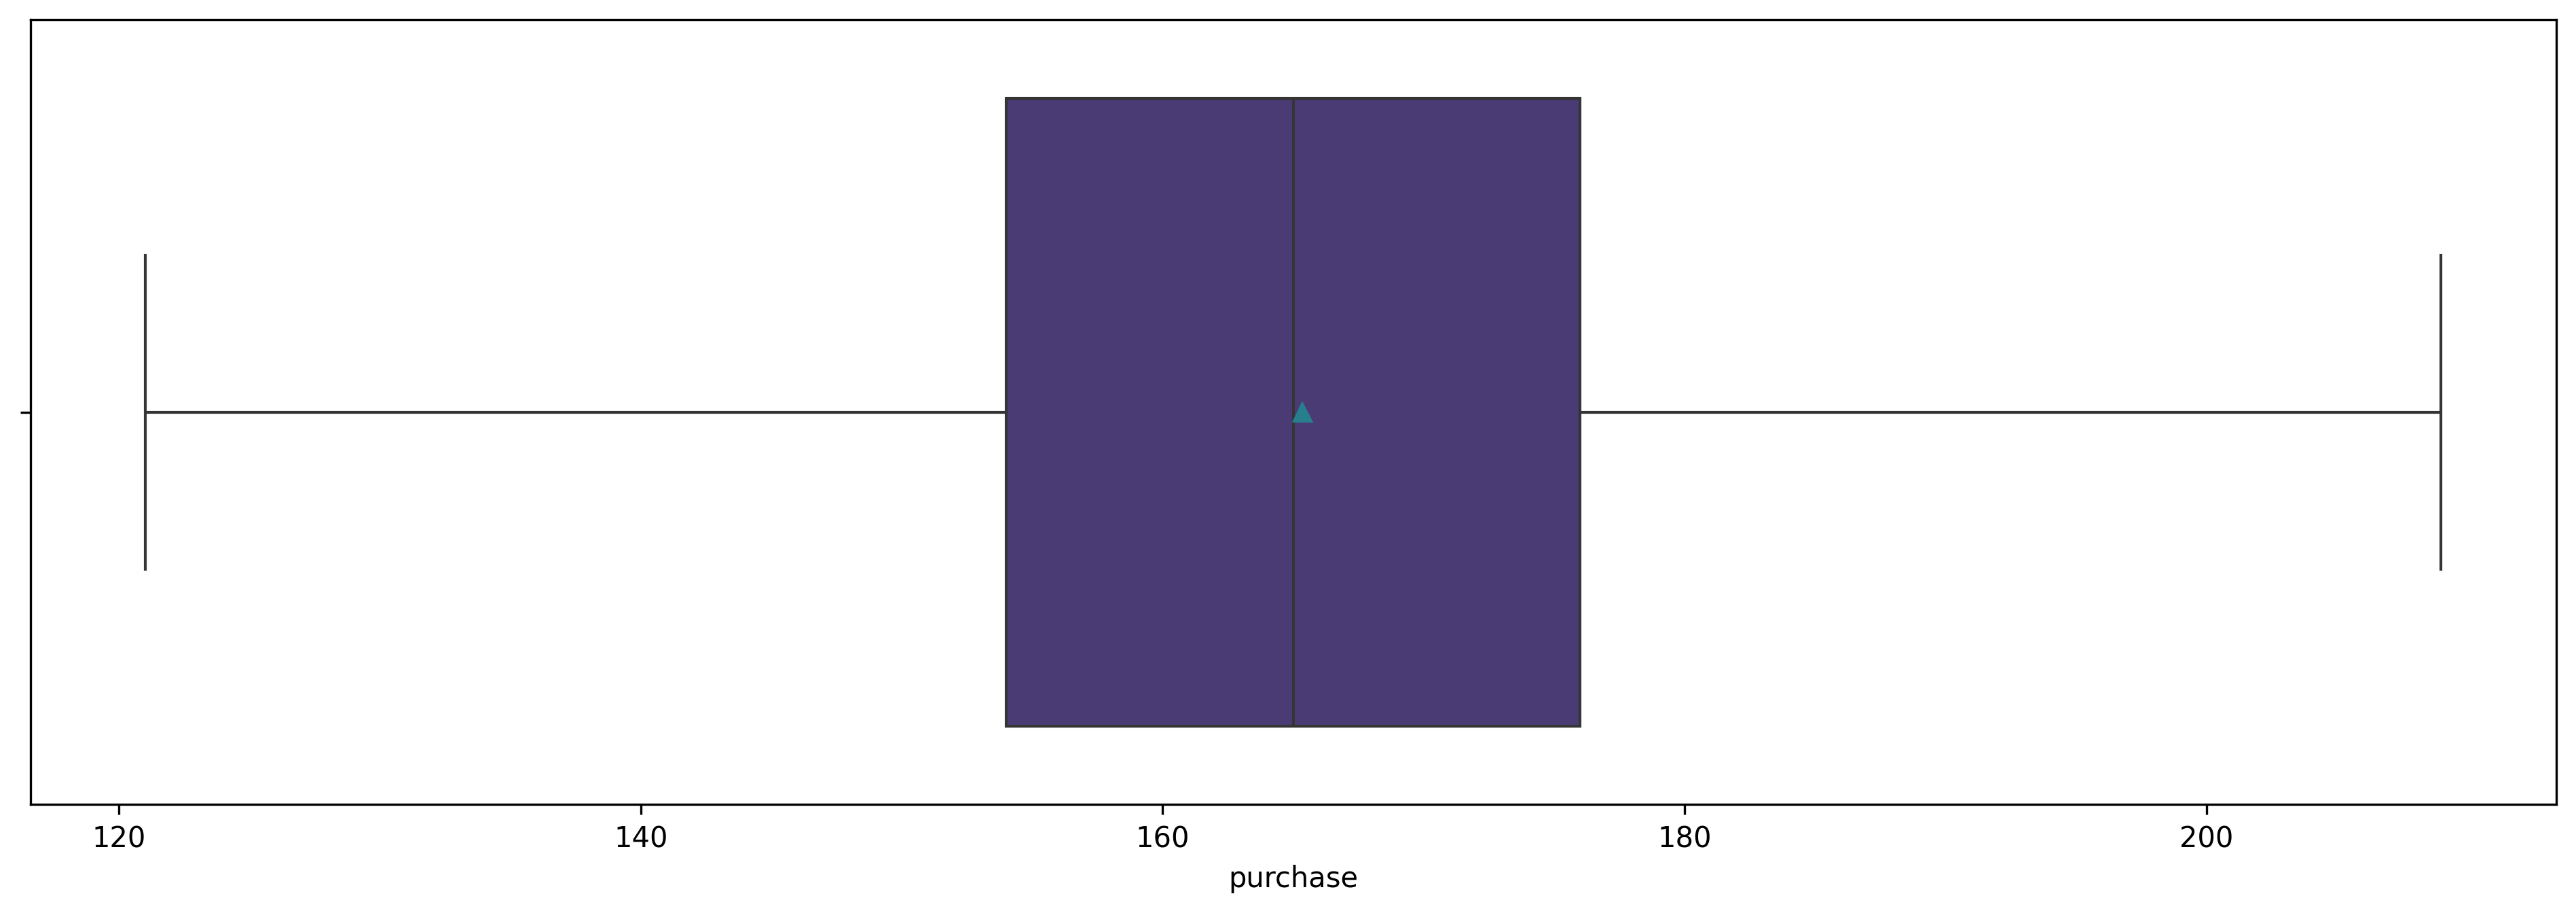

In [23]:
q3 = dataset['purchase'].quantile(0.75)
q1 = dataset['purchase'].quantile(0.25)
iqr = q3-q1
upper_line = q3 + (1.5*iqr)
lower_line = q1 - (1.5*iqr)

print(upper_line)
print(q3)
print(iqr)
print(q1)
print(lower_line)

dataset = dataset[(dataset['purchase'] <= upper_line) & ((dataset['purchase'] >= lower_line))]

figure()
sns.boxplot(x=dataset['purchase'], showmeans=True)
plt.show()

### Repeat Purchase

In [24]:
repeat_purchase = dataset[['transaction_date','customer_id','customer_type']].pivot_table(values='transaction_date', index='customer_id', columns='customer_type', aggfunc='count')
repeat_purchase.head()

customer_type,casual,member
customer_id,,
1,20.0,NaN
2,NaN,9.0
3,6.0,NaN
4,NaN,8.0
5,12.0,NaN


In [25]:
member_repeat_purchase = repeat_purchase['member'].dropna()
casual_repeat_purchase = repeat_purchase['casual'].dropna()

### Money Spent

In [26]:
purchase_sum = pd.DataFrame(dataset.groupby(['customer_id', 'customer_type'])['purchase'].sum()).reset_index()

# purchase or money spent
member_purchase_sum = purchase_sum[purchase_sum['customer_type'] == 'member']['purchase']
casual_purchase_sum = purchase_sum[purchase_sum['customer_type'] == 'casual']['purchase']

In [27]:
purchase_mean = pd.DataFrame(dataset.groupby(['customer_id', 'customer_type'])['purchase'].mean()).reset_index()

# purchase or money spent
member_purchase_mean = purchase_mean[purchase_mean['customer_type'] == 'member']['purchase']
casual_purchase_mean = purchase_mean[purchase_mean['customer_type'] == 'casual']['purchase']

### City by Customer Type

In [28]:
# contingency table for
crosstab = dataset.pivot_table(index='city', columns='customer_type', values='customer_id', aggfunc='nunique')
crosstab

customer_type,casual,member
city,,
Bekasi,20,7
Bogor,59,24
Depok,37,26
Jakarta,146,73
Tangerang,103,56


## Modeling

If the variable is normally distributed, we need to check whether or not the two groups have equal variance. Since the groups are not normally distributed, we can skip levine test.

In [29]:
def h0(p):
    if p < 0.05:
        return 'accept to reject'
    else:
        return 'fail to reject'

### Customer Repeat Purchase

In [30]:
stat_repeat_purchase, p_repeat_purchase = stats.mannwhitneyu(member_repeat_purchase, casual_repeat_purchase)

In [31]:
h0(p_repeat_purchase)

'fail to reject'

In [32]:
customer_repeat_purchase = ['member_repeat_purchase',
                            'casual_repeat_purchase',
                            'numeric',
                            stat_repeat_purchase.round(3),
                            p_repeat_purchase.round(3),
                            h0(p_repeat_purchase)]

In [33]:
print(f"With p-value {p_repeat_purchase:.3f} > 0.05, we fail to reject HO.")

With p-value 0.289 > 0.05, we fail to reject HO.


In [34]:
member_repeat_purchase_table = pd.DataFrame({'customer_type': 'member',
                                             'count': member_repeat_purchase})
casual_repeat_purchase_table = pd.DataFrame({'customer_type': 'casual',
                                             'count': casual_repeat_purchase})
repeat_purchase_table = pd.concat([member_repeat_purchase_table, casual_repeat_purchase_table], axis=0)

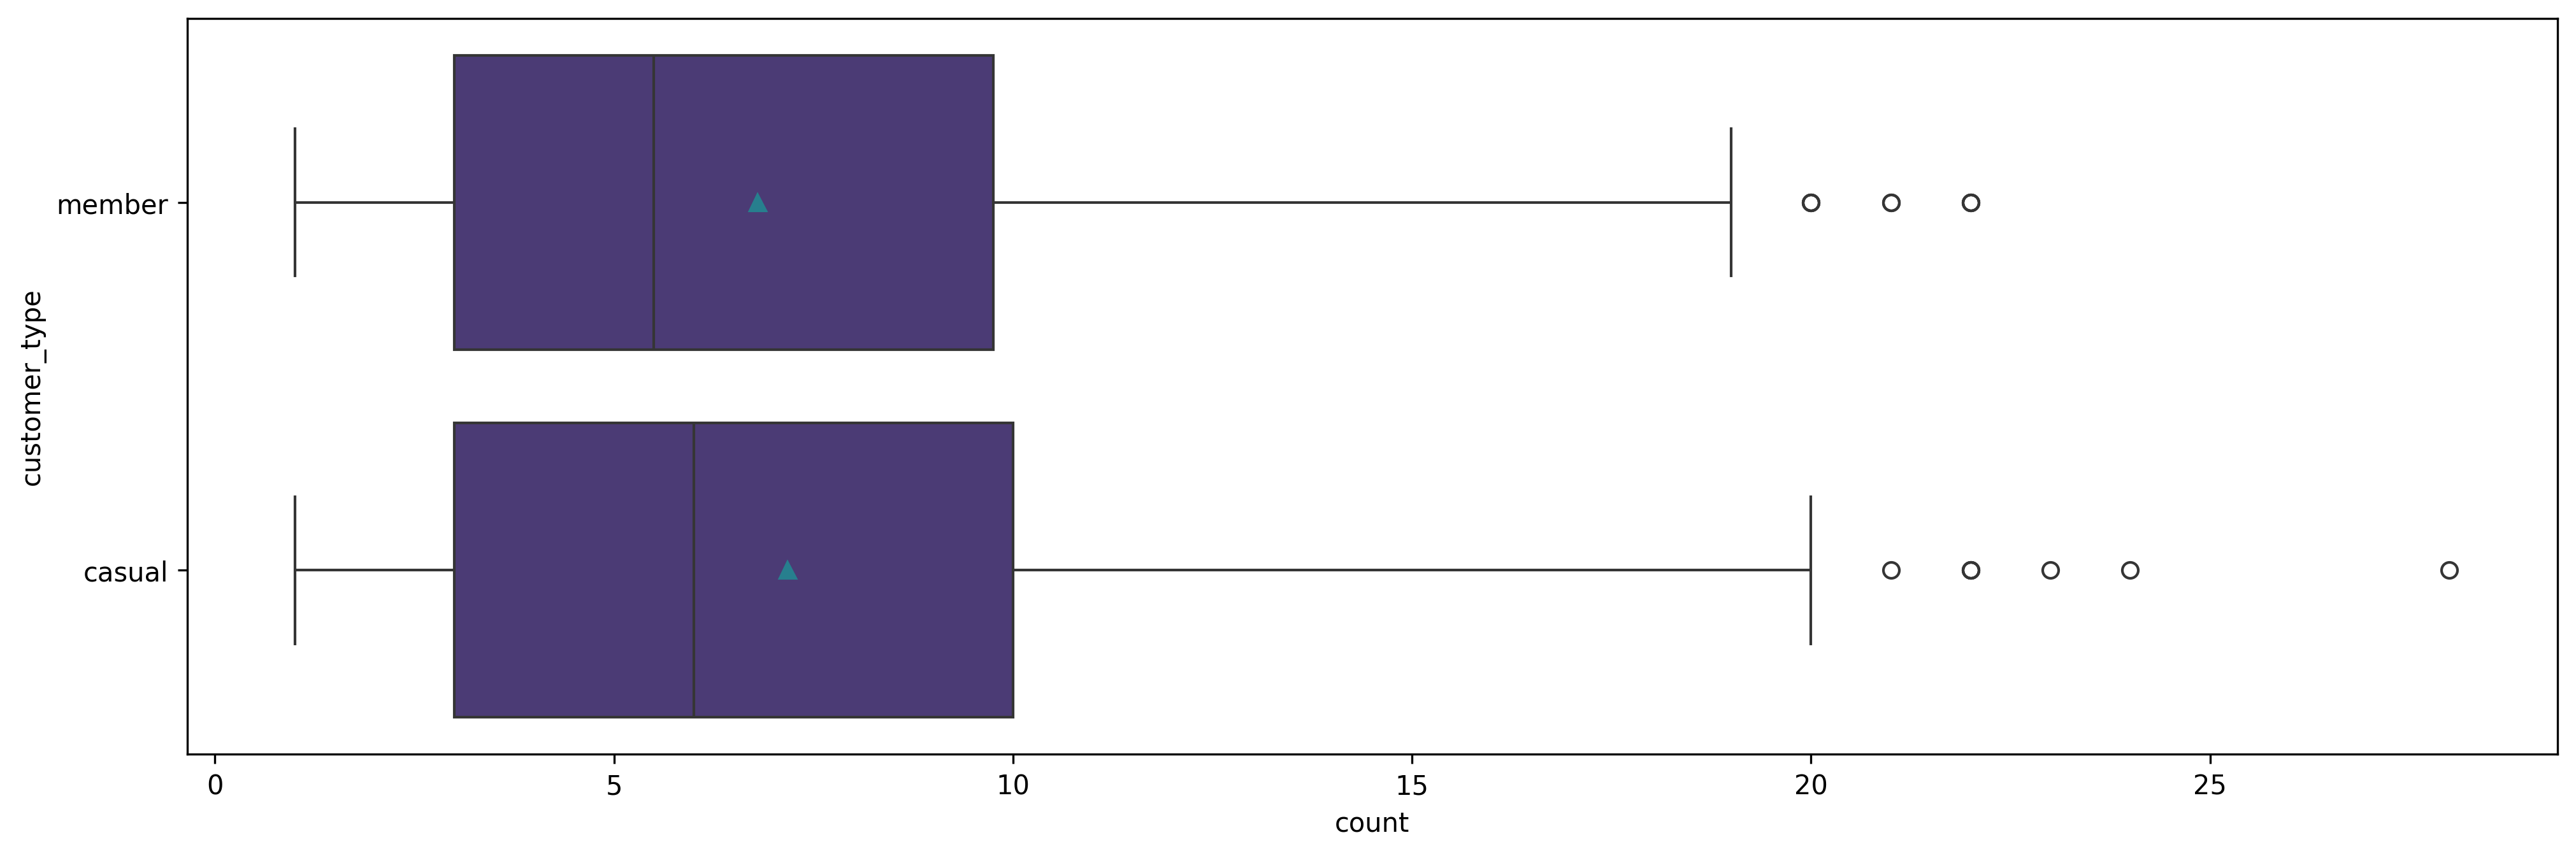

In [35]:
figure()
sns.boxplot(repeat_purchase_table, x='count', y='customer_type', showmeans=True)
plt.show()

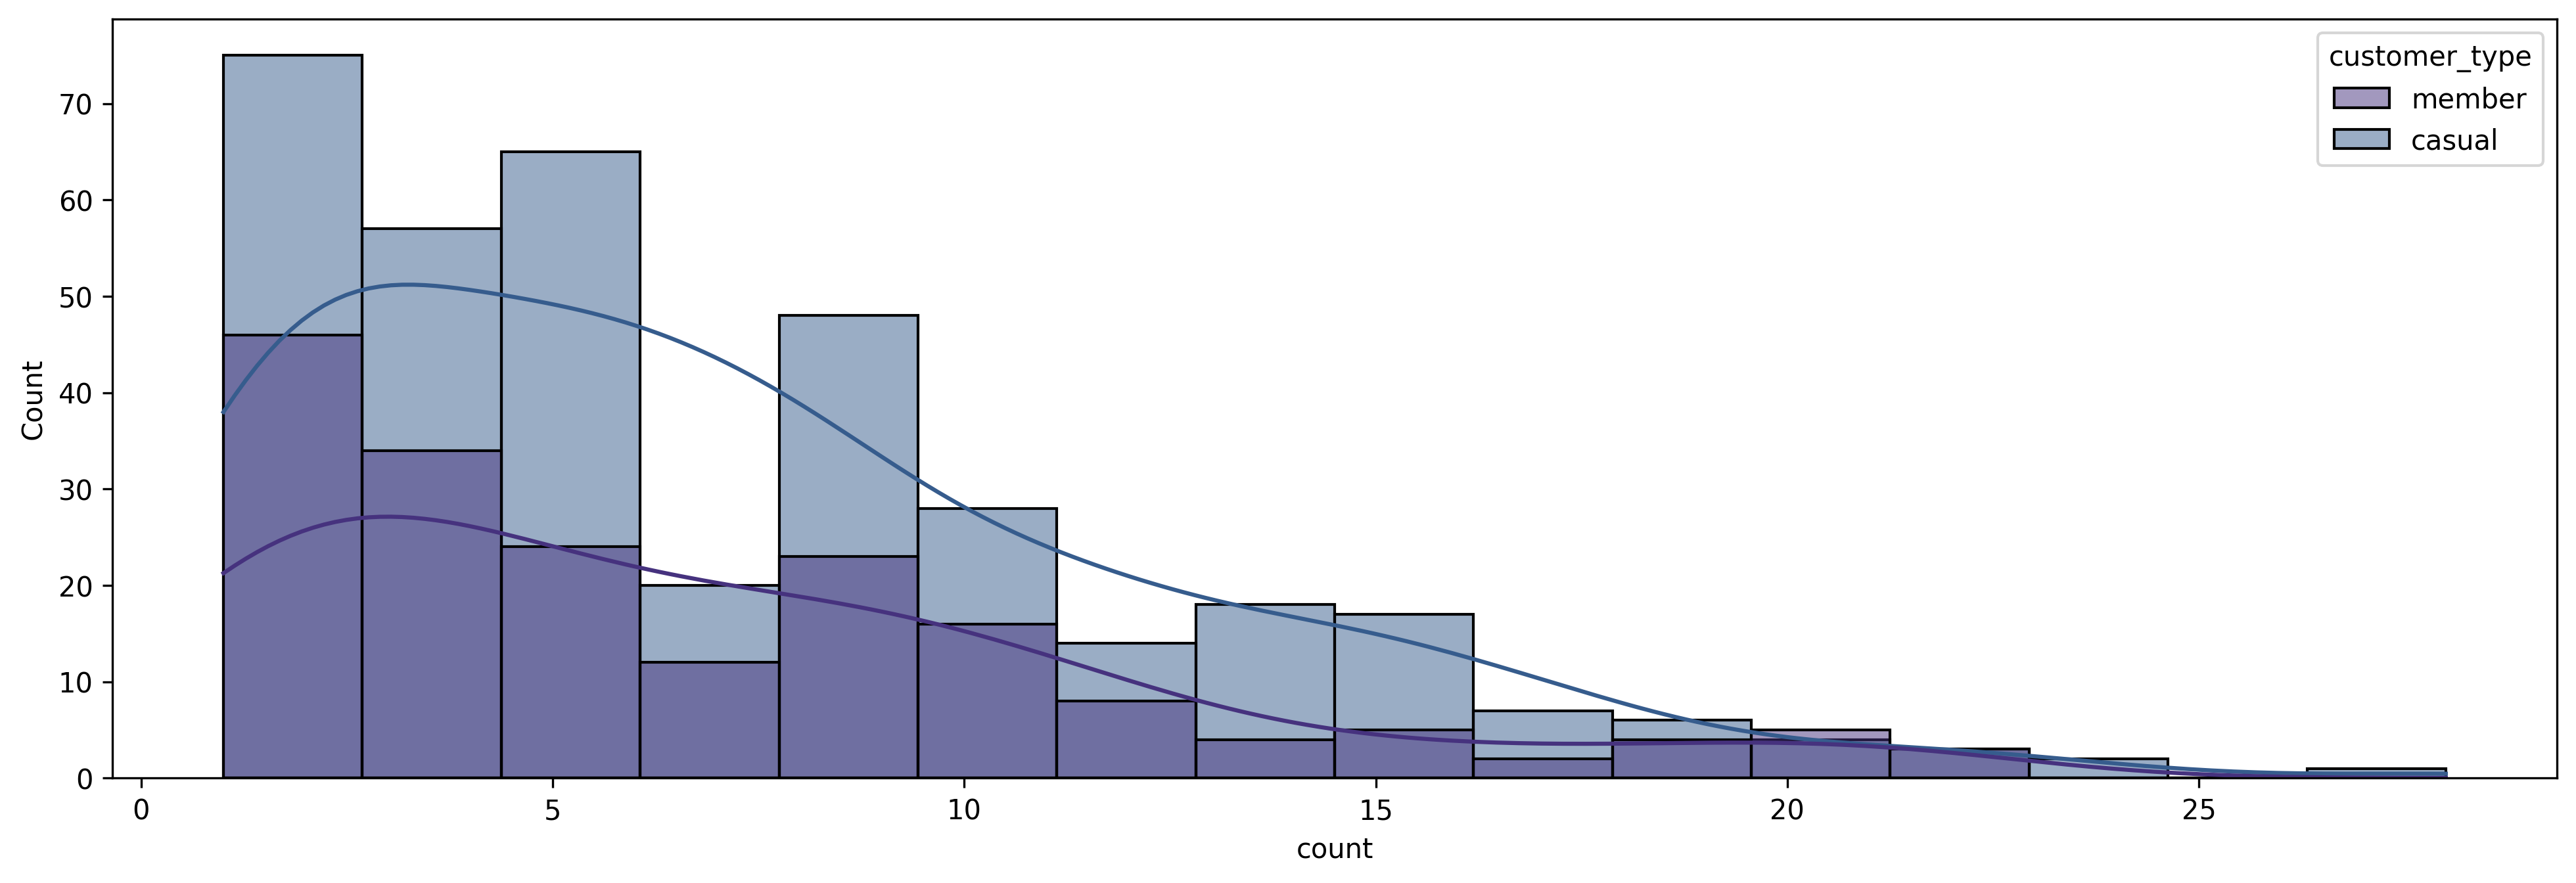

In [36]:
figure()
sns.histplot(repeat_purchase_table, x='count', hue='customer_type', kde=True)
plt.show()

### Customer Money Spent using Sum

In [37]:
stat_purchase_sum, p_purchase_sum = stats.mannwhitneyu(member_purchase_sum, casual_purchase_sum)

In [38]:
h0(p_purchase_sum)

'fail to reject'

In [39]:
customer_purchase_using_sum = ['member_purchase_sum',
                               'casual_purchase_sum',
                               'numeric',
                               stat_purchase_sum.round(3),
                               p_purchase_sum.round(3),
                               h0(p_purchase_sum)]

In [40]:
print(f"With p-value {p_purchase_sum:.3f} > 0.05, we fail to reject H0. There is no significant different mean between member and casual customers.")

With p-value 0.796 > 0.05, we fail to reject H0. There is no significant different mean between member and casual customers.


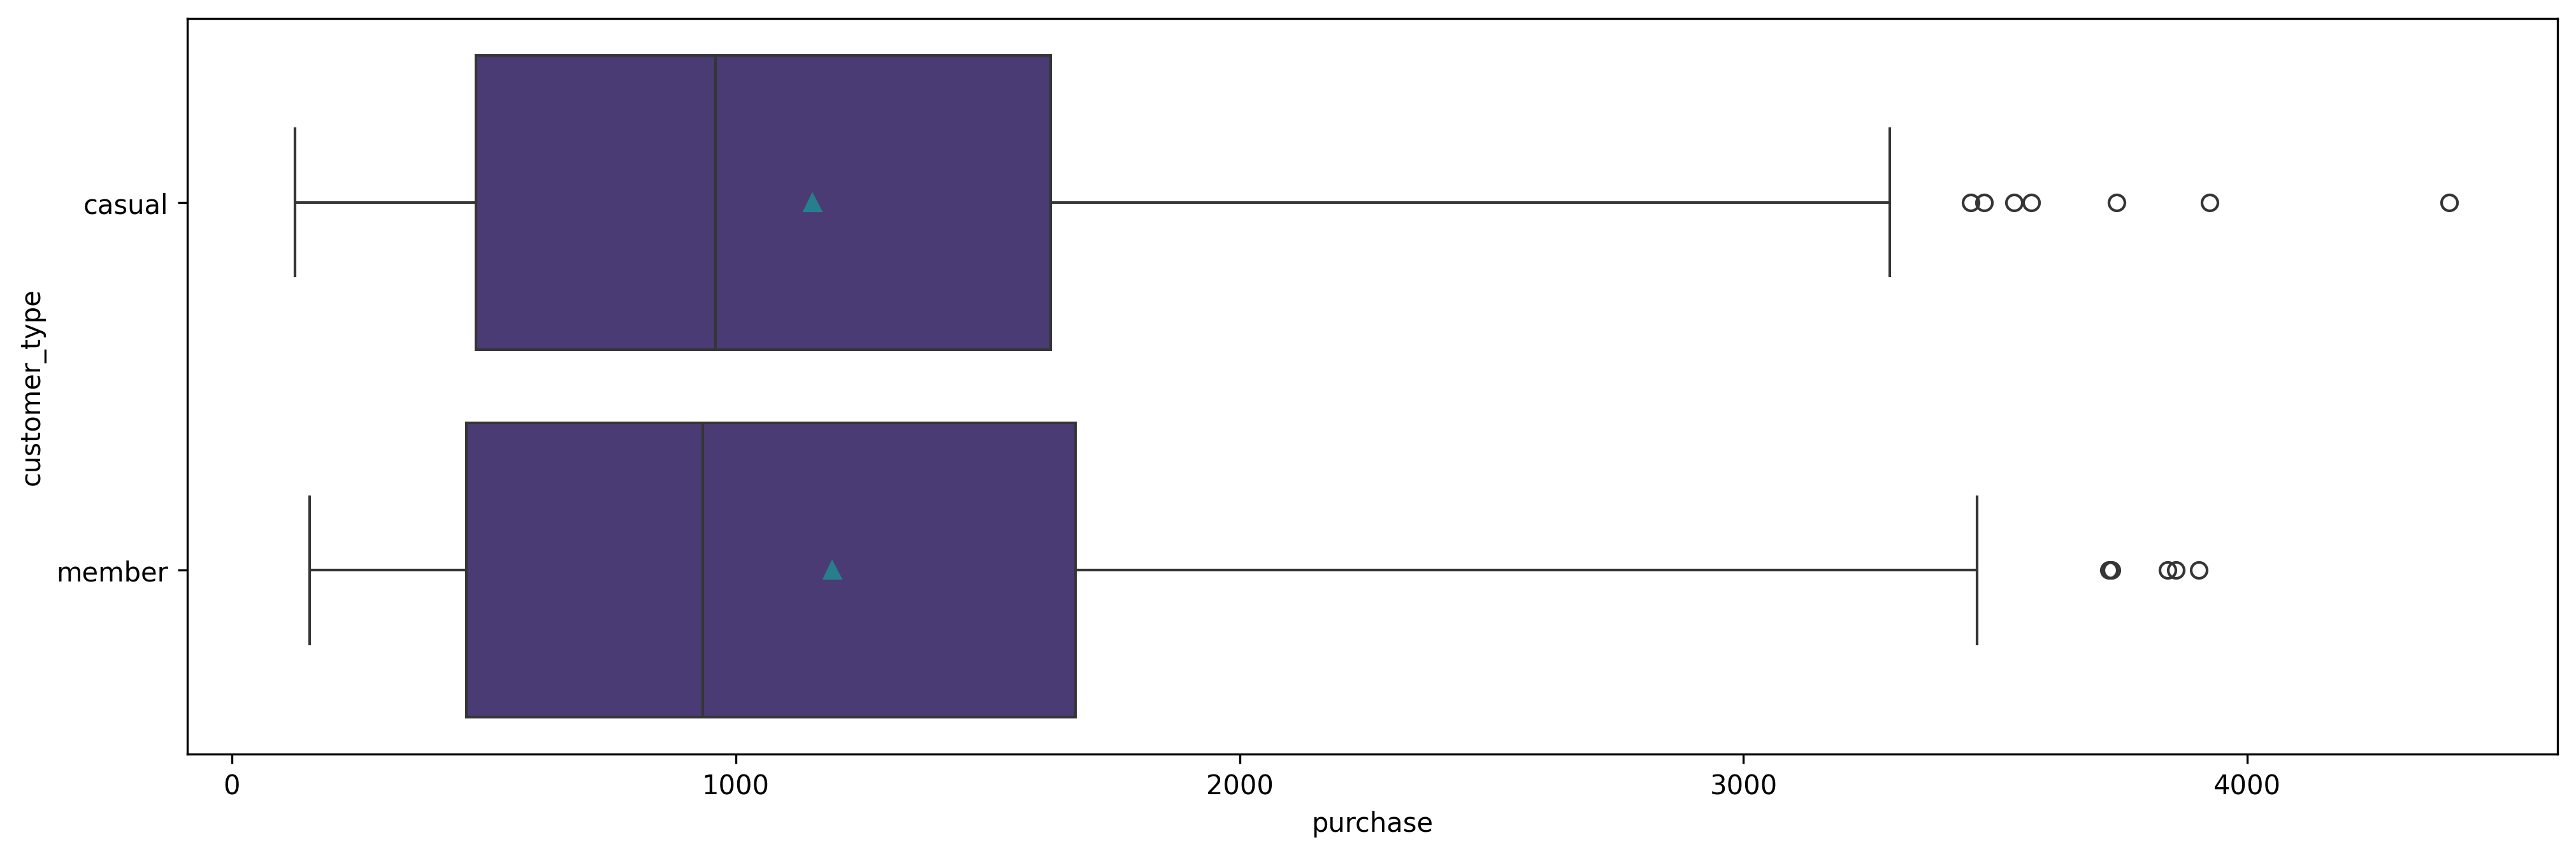

In [41]:
figure()
sns.boxplot(purchase_sum, x='purchase', y='customer_type', showmeans=True)
plt.show()

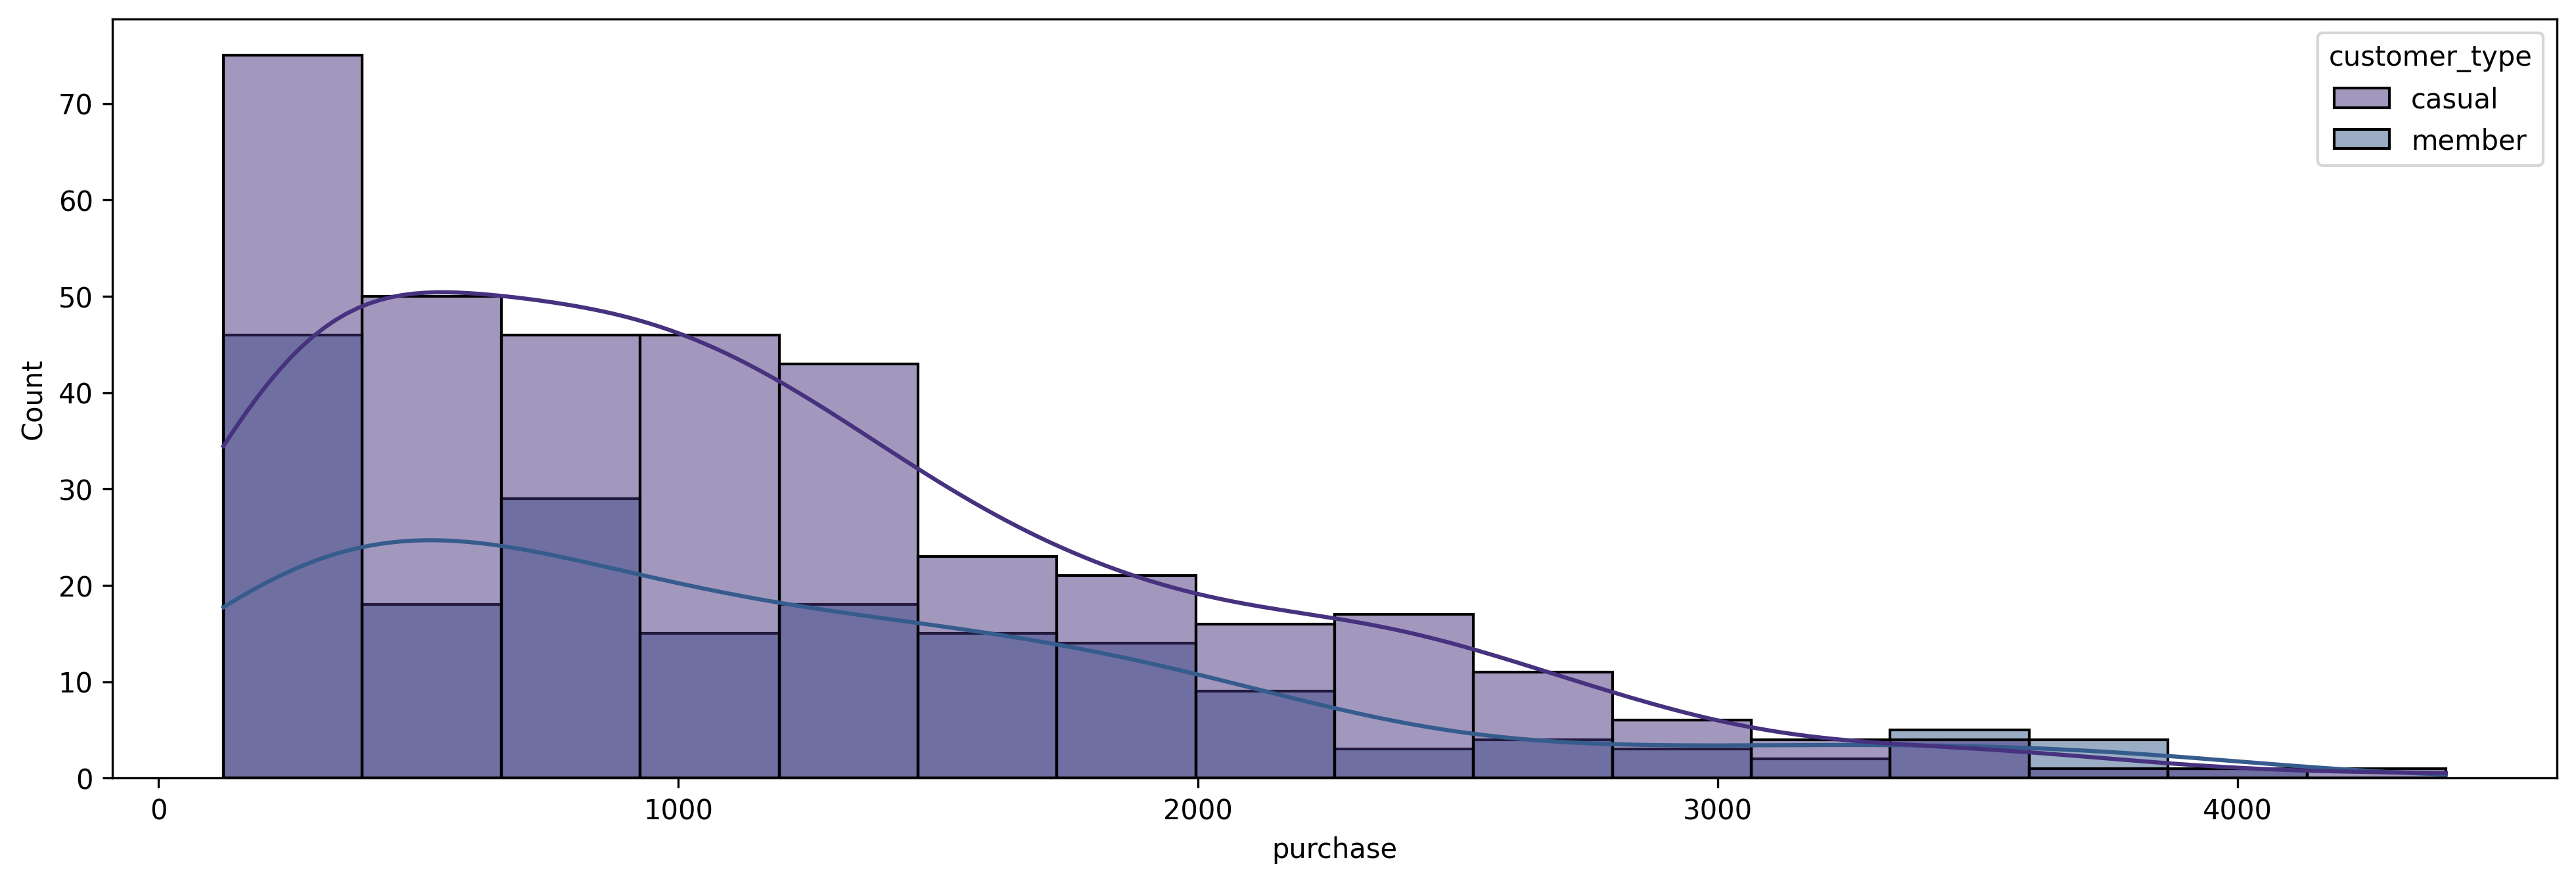

In [42]:
figure()
sns.histplot(purchase_sum, x='purchase', hue='customer_type', kde=True)
plt.show()

### Customer Money Spent using Mean

In [43]:
stat_purchase_mean, p_purchase_mean = stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean)

In [44]:
h0(p_purchase_mean)

'accept to reject'

In [45]:
customer_purchase_using_mean = ['member_purchase_mean',
                                'casual_purchase_mean',
                                'numeric',
                                stat_purchase_mean.round(3),
                                p_purchase_mean.round(3),
                                h0(p_purchase_mean)]

In [46]:
print(f"With p-value {p_purchase_mean:.3f} < 0.05, we accept to reject H0. There is a significant different mean between member and casual customers.")

With p-value 0.000 < 0.05, we accept to reject H0. There is a significant different mean between member and casual customers.


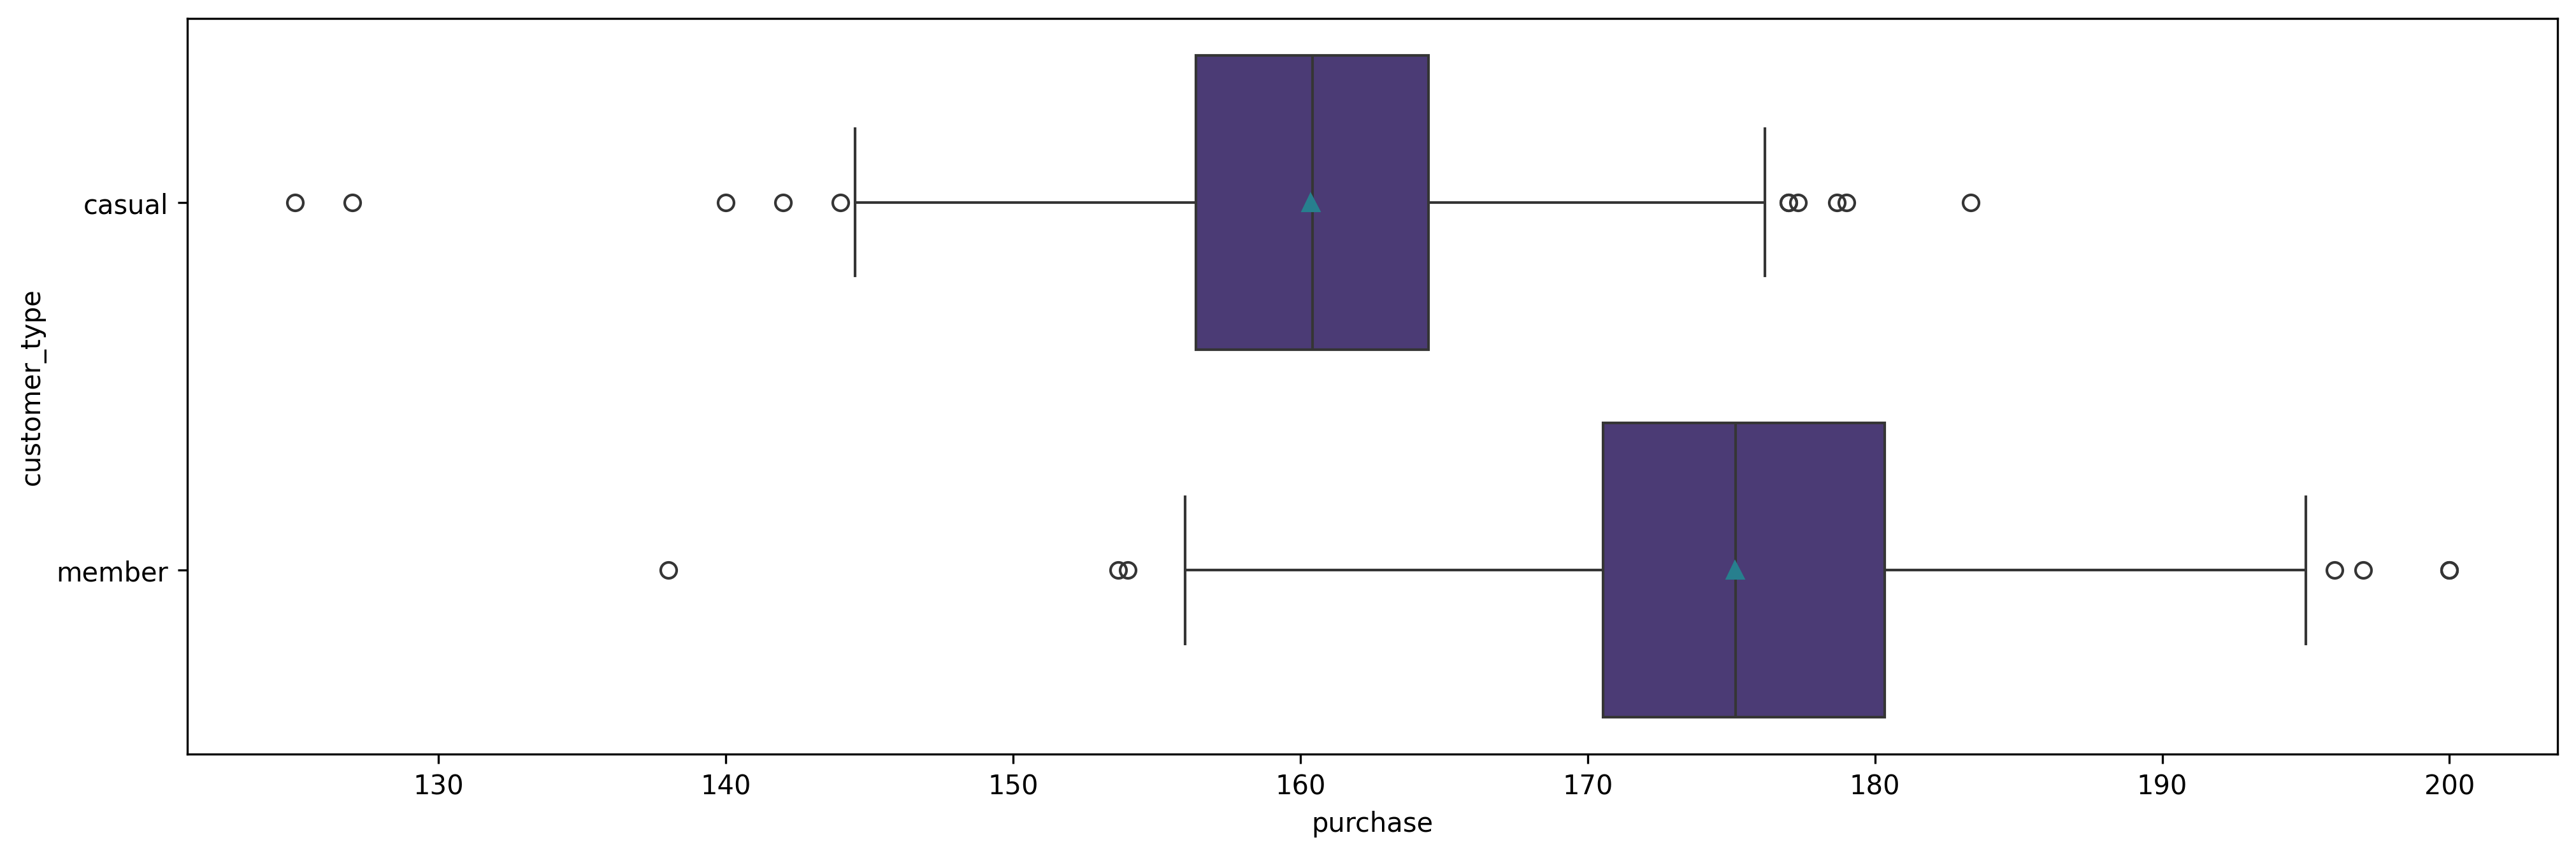

In [47]:
figure()
sns.boxplot(purchase_mean, x='purchase', y='customer_type', showmeans=True)
plt.show()

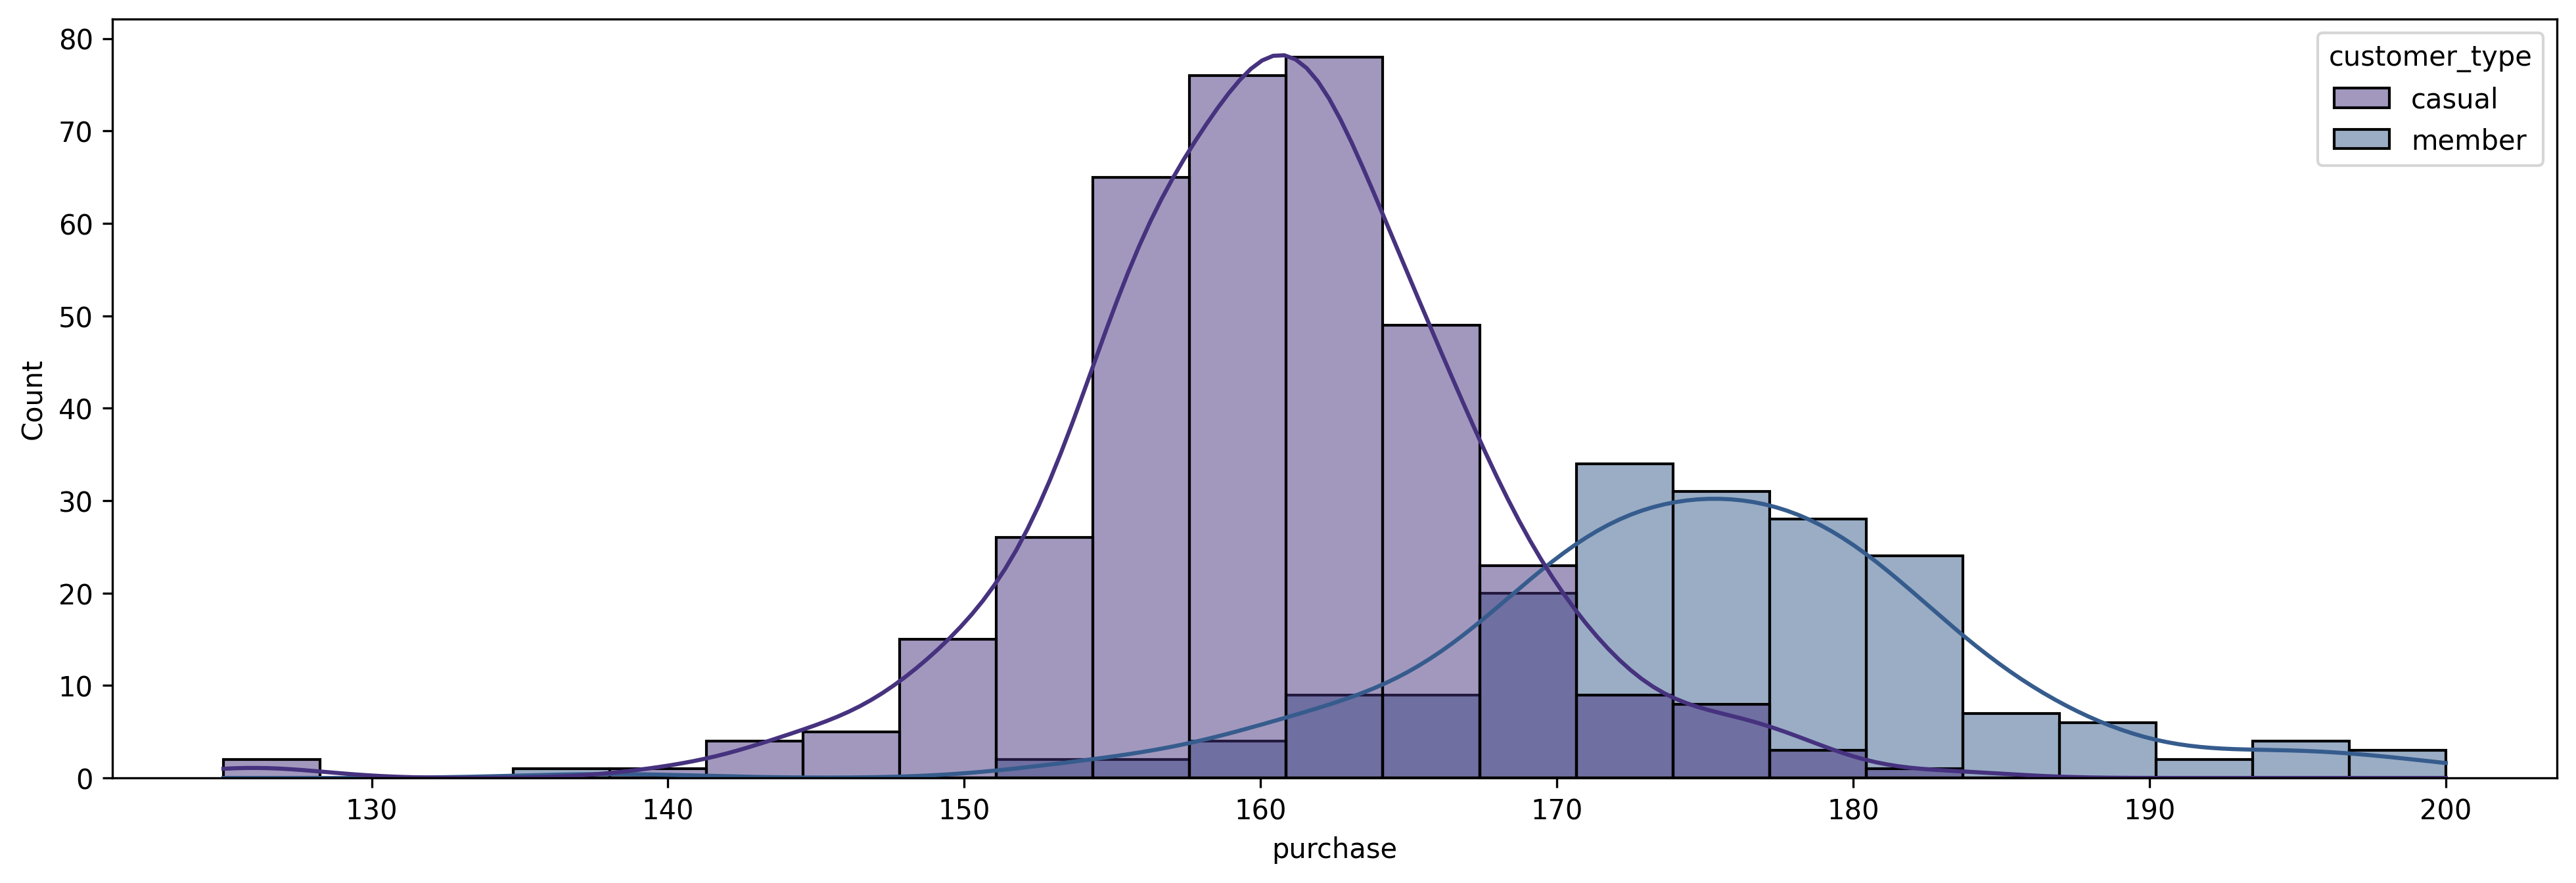

In [48]:
figure()
sns.histplot(purchase_mean, x='purchase', hue='customer_type', kde=True)
plt.show()

We can see that member customers are slightly bigger in purchasing power. Let's test using one sided greater testing.

In [49]:
print(f"{h0(stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean, alternative='greater')[1])} H0 with p-value {stats.mannwhitneyu(member_purchase_mean, casual_purchase_mean, alternative='greater')[1]}")

accept to reject H0 with p-value 6.537869051977083e-58


After we change the alternative parameter into 'greater' from scipy.stats module, we get the result that member purchasing powers are greater than casual purchasing powers.

### Total Customer for Each City by Customer Type

In [50]:
stat, p, dof, exp = stats.chi2_contingency(crosstab)

In [51]:
h0(p=p)

'fail to reject'

In [52]:
customer_total = ['city',
                  'customer_type',
                  'categorical',
                  stat.round(3),
                  p.round(3),
                  h0(p)]

In [53]:
print(f"With p-value {p:.3f} > 0.05, we fail to reject H0. There is no significant association between city and customers that decide to become members.")

With p-value 0.498 > 0.05, we fail to reject H0. There is no significant association between city and customers that decide to become members.


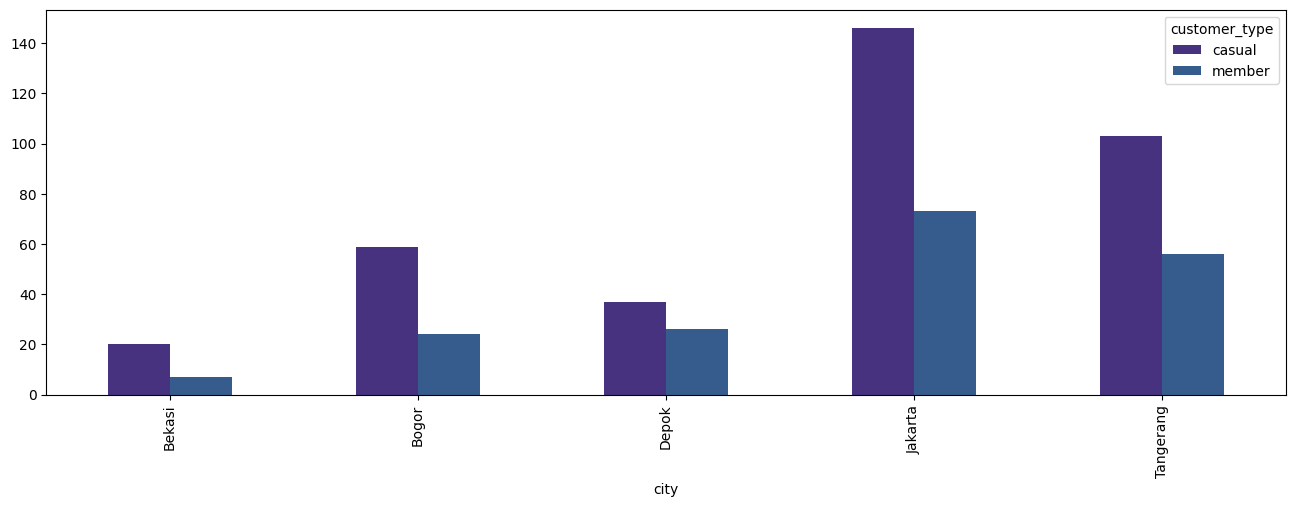

In [54]:
crosstab.plot(kind='bar', figsize=(16,5))
plt.show()

## Insights

### Interpretation and Reporting

In [55]:
all_results = pd.DataFrame({'customer_repeat_purchase': customer_repeat_purchase,
              'customer_purchase_using_sum': customer_purchase_using_sum,
              'customer_purchase_using_mean': customer_purchase_using_mean,
              'customer_total': customer_total}, index=['a','b','type','statistics','p-value','null hypothesis']).T
(all_results)

,a,b,type,statistics,p-value,null hypothesis
customer_repeat_purchase,member_repeat_purchase,casual_repeat_purchase,numeric,32077.0,0.289,fail to reject
customer_purchase_using_sum,member_purchase_sum,casual_purchase_sum,numeric,34401.5,0.796,fail to reject
customer_purchase_using_mean,member_purchase_mean,casual_purchase_mean,numeric,62217.5,0.0,accept to reject
customer_total,city,customer_type,categorical,3.37,0.498,fail to reject


From the table above, we can see that:
- customer repeat purchases:
    - there are no significant differences in retention between member and casual customers.
    - it means, the loyalty program did not make member customers repeat purchase more than casual customers.
- total customer purchases:
    - there are no significant differences in total purchase between member and casual customers.
    - it means, even if there are way more casual members, but there is enough evidence that the purchasing power of total member customers are equal to the purchasing power of total casual customers.
- average customer purchases:
    - there is a significant difference in average customer purchases between member and casual customers.
    - we also try one sided greater test and the result is the purchasing power of member customers are greater than the purchasing power of casual customers.
    - it means, although the retention rate of member customers are low, everytime they make transaction, the amount of purchases are big.
- total member customers for each city compared to total casual customers:
    - there are no significant associations between city and whether they become member or casual customers.
    - it means, the loyalty program has no different impact for each city.

### Action